In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
tf.enable_eager_execution()  
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

1.14.0


In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [3]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [4]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

In [6]:
print(tf.__version__)

1.14.0


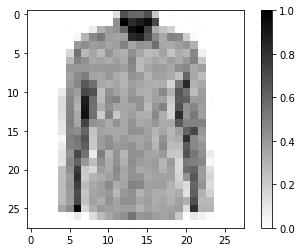

In [5]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

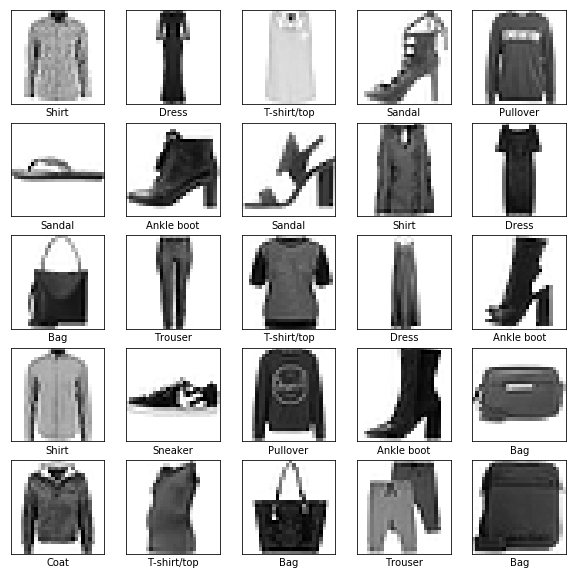

In [7]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10


 265/1875 [===>..........................] - ETA: 8:17:08 - loss: 2.3254 - acc: 0.09 - ETA: 2:46:30 - loss: 2.2526 - acc: 0.19 - ETA: 1:40:17 - loss: 2.1854 - acc: 0.23 - ETA: 1:23:56 - loss: 2.1495 - acc: 0.25 - ETA: 1:03:14 - loss: 2.0664 - acc: 0.27 - ETA: 56:24 - loss: 2.0164 - acc: 0.2778 - ETA: 50:58 - loss: 1.9758 - acc: 0.30 - ETA: 42:40 - loss: 1.9003 - acc: 0.33 - ETA: 39:31 - loss: 1.8833 - acc: 0.34 - ETA: 36:49 - loss: 1.8448 - acc: 0.34 - ETA: 32:21 - loss: 1.7623 - acc: 0.37 - ETA: 30:33 - loss: 1.7307 - acc: 0.39 - ETA: 27:27 - loss: 1.6887 - acc: 0.40 - ETA: 24:57 - loss: 1.6333 - acc: 0.42 - ETA: 22:53 - loss: 1.5825 - acc: 0.44 - ETA: 22:00 - loss: 1.5756 - acc: 0.45 - ETA: 21:11 - loss: 1.5593 - acc: 0.45 - ETA: 19:42 - loss: 1.5183 - acc: 0.46 - ETA: 19:03 - loss: 1.4941 - acc: 0.47 - ETA: 18:28 - loss: 1.4720 - acc: 0.48 - ETA: 17:21 - loss: 1.4419 - acc: 0.49 - ETA: 16:52 - loss: 1.4244 - acc: 0.50 - ETA: 16:24 - loss: 1.4006 - acc: 0.50 - ETA: 15:32 - loss: 1.36

 526/1875 [=======>......................] - ETA: 3:08 - loss: 0.6903 - acc: 0.752 - ETA: 3:08 - loss: 0.6895 - acc: 0.752 - ETA: 3:08 - loss: 0.6887 - acc: 0.752 - ETA: 3:07 - loss: 0.6879 - acc: 0.752 - ETA: 3:07 - loss: 0.6885 - acc: 0.752 - ETA: 3:06 - loss: 0.6873 - acc: 0.753 - ETA: 3:05 - loss: 0.6878 - acc: 0.753 - ETA: 3:04 - loss: 0.6859 - acc: 0.753 - ETA: 3:04 - loss: 0.6850 - acc: 0.753 - ETA: 3:03 - loss: 0.6838 - acc: 0.754 - ETA: 3:02 - loss: 0.6822 - acc: 0.755 - ETA: 3:02 - loss: 0.6811 - acc: 0.755 - ETA: 3:01 - loss: 0.6805 - acc: 0.756 - ETA: 3:01 - loss: 0.6791 - acc: 0.756 - ETA: 3:00 - loss: 0.6780 - acc: 0.756 - ETA: 3:00 - loss: 0.6777 - acc: 0.756 - ETA: 2:59 - loss: 0.6766 - acc: 0.757 - ETA: 2:58 - loss: 0.6766 - acc: 0.757 - ETA: 2:58 - loss: 0.6762 - acc: 0.757 - ETA: 2:57 - loss: 0.6747 - acc: 0.757 - ETA: 2:56 - loss: 0.6727 - acc: 0.758 - ETA: 2:56 - loss: 0.6720 - acc: 0.758 - ETA: 2:55 - loss: 0.6701 - acc: 0.759 - ETA: 2:54 - loss: 0.6693 - acc: 0.7

 815/1875 [============>.................] - ETA: 1:58 - loss: 0.5715 - acc: 0.795 - ETA: 1:58 - loss: 0.5709 - acc: 0.796 - ETA: 1:58 - loss: 0.5711 - acc: 0.796 - ETA: 1:58 - loss: 0.5707 - acc: 0.796 - ETA: 1:57 - loss: 0.5702 - acc: 0.796 - ETA: 1:57 - loss: 0.5697 - acc: 0.796 - ETA: 1:57 - loss: 0.5692 - acc: 0.796 - ETA: 1:57 - loss: 0.5691 - acc: 0.796 - ETA: 1:57 - loss: 0.5685 - acc: 0.797 - ETA: 1:57 - loss: 0.5679 - acc: 0.797 - ETA: 1:56 - loss: 0.5675 - acc: 0.797 - ETA: 1:56 - loss: 0.5672 - acc: 0.797 - ETA: 1:56 - loss: 0.5668 - acc: 0.797 - ETA: 1:56 - loss: 0.5668 - acc: 0.797 - ETA: 1:56 - loss: 0.5660 - acc: 0.797 - ETA: 1:55 - loss: 0.5652 - acc: 0.798 - ETA: 1:55 - loss: 0.5652 - acc: 0.797 - ETA: 1:55 - loss: 0.5650 - acc: 0.797 - ETA: 1:55 - loss: 0.5648 - acc: 0.798 - ETA: 1:54 - loss: 0.5641 - acc: 0.798 - ETA: 1:54 - loss: 0.5638 - acc: 0.798 - ETA: 1:54 - loss: 0.5627 - acc: 0.798 - ETA: 1:53 - loss: 0.5627 - acc: 0.798 - ETA: 1:53 - loss: 0.5620 - acc: 0.7

1117/1875 [================>.............] - ETA: 1:20 - loss: 0.5040 - acc: 0.820 - ETA: 1:20 - loss: 0.5036 - acc: 0.820 - ETA: 1:20 - loss: 0.5033 - acc: 0.820 - ETA: 1:20 - loss: 0.5028 - acc: 0.820 - ETA: 1:20 - loss: 0.5025 - acc: 0.820 - ETA: 1:20 - loss: 0.5027 - acc: 0.820 - ETA: 1:20 - loss: 0.5025 - acc: 0.820 - ETA: 1:20 - loss: 0.5028 - acc: 0.820 - ETA: 1:20 - loss: 0.5025 - acc: 0.820 - ETA: 1:20 - loss: 0.5023 - acc: 0.820 - ETA: 1:19 - loss: 0.5021 - acc: 0.821 - ETA: 1:19 - loss: 0.5019 - acc: 0.821 - ETA: 1:19 - loss: 0.5018 - acc: 0.821 - ETA: 1:19 - loss: 0.5016 - acc: 0.821 - ETA: 1:19 - loss: 0.5015 - acc: 0.821 - ETA: 1:19 - loss: 0.5011 - acc: 0.821 - ETA: 1:19 - loss: 0.5007 - acc: 0.821 - ETA: 1:19 - loss: 0.5005 - acc: 0.821 - ETA: 1:18 - loss: 0.5003 - acc: 0.821 - ETA: 1:18 - loss: 0.4999 - acc: 0.821 - ETA: 1:18 - loss: 0.4996 - acc: 0.822 - ETA: 1:18 - loss: 0.4989 - acc: 0.822 - ETA: 1:18 - loss: 0.4988 - acc: 0.822 - ETA: 1:18 - loss: 0.4983 - acc: 0.8

1416/1875 [=====================>........] - ETA: 53s - loss: 0.4582 - acc: 0.83 - ETA: 53s - loss: 0.4580 - acc: 0.83 - ETA: 52s - loss: 0.4580 - acc: 0.83 - ETA: 52s - loss: 0.4577 - acc: 0.83 - ETA: 52s - loss: 0.4575 - acc: 0.83 - ETA: 52s - loss: 0.4570 - acc: 0.83 - ETA: 52s - loss: 0.4564 - acc: 0.83 - ETA: 52s - loss: 0.4563 - acc: 0.83 - ETA: 52s - loss: 0.4560 - acc: 0.83 - ETA: 51s - loss: 0.4560 - acc: 0.83 - ETA: 51s - loss: 0.4555 - acc: 0.83 - ETA: 51s - loss: 0.4550 - acc: 0.83 - ETA: 51s - loss: 0.4547 - acc: 0.83 - ETA: 51s - loss: 0.4545 - acc: 0.83 - ETA: 50s - loss: 0.4541 - acc: 0.83 - ETA: 50s - loss: 0.4543 - acc: 0.83 - ETA: 50s - loss: 0.4543 - acc: 0.83 - ETA: 50s - loss: 0.4540 - acc: 0.83 - ETA: 50s - loss: 0.4537 - acc: 0.83 - ETA: 50s - loss: 0.4535 - acc: 0.83 - ETA: 50s - loss: 0.4533 - acc: 0.83 - ETA: 49s - loss: 0.4531 - acc: 0.83 - ETA: 49s - loss: 0.4526 - acc: 0.83 - ETA: 49s - loss: 0.4525 - acc: 0.83 - ETA: 49s - loss: 0.4524 - acc: 0.83 - ETA: 

1633/1875 [=========================>....] - ETA: 30s - loss: 0.4287 - acc: 0.84 - ETA: 30s - loss: 0.4287 - acc: 0.84 - ETA: 30s - loss: 0.4285 - acc: 0.84 - ETA: 30s - loss: 0.4285 - acc: 0.84 - ETA: 30s - loss: 0.4285 - acc: 0.84 - ETA: 30s - loss: 0.4283 - acc: 0.84 - ETA: 30s - loss: 0.4282 - acc: 0.84 - ETA: 30s - loss: 0.4281 - acc: 0.84 - ETA: 30s - loss: 0.4280 - acc: 0.84 - ETA: 30s - loss: 0.4279 - acc: 0.84 - ETA: 30s - loss: 0.4281 - acc: 0.84 - ETA: 30s - loss: 0.4280 - acc: 0.84 - ETA: 30s - loss: 0.4278 - acc: 0.84 - ETA: 30s - loss: 0.4277 - acc: 0.84 - ETA: 29s - loss: 0.4277 - acc: 0.84 - ETA: 29s - loss: 0.4276 - acc: 0.84 - ETA: 29s - loss: 0.4274 - acc: 0.84 - ETA: 29s - loss: 0.4273 - acc: 0.84 - ETA: 29s - loss: 0.4272 - acc: 0.84 - ETA: 29s - loss: 0.4271 - acc: 0.84 - ETA: 29s - loss: 0.4271 - acc: 0.84 - ETA: 29s - loss: 0.4271 - acc: 0.84 - ETA: 29s - loss: 0.4272 - acc: 0.84 - ETA: 29s - loss: 0.4270 - acc: 0.84 - ETA: 29s - loss: 0.4268 - acc: 0.84 - ETA: 

1849/1875 [============================>.] - ETA: 16s - loss: 0.4116 - acc: 0.85 - ETA: 16s - loss: 0.4115 - acc: 0.85 - ETA: 16s - loss: 0.4116 - acc: 0.85 - ETA: 16s - loss: 0.4116 - acc: 0.85 - ETA: 16s - loss: 0.4115 - acc: 0.85 - ETA: 16s - loss: 0.4114 - acc: 0.85 - ETA: 16s - loss: 0.4113 - acc: 0.85 - ETA: 15s - loss: 0.4111 - acc: 0.85 - ETA: 15s - loss: 0.4111 - acc: 0.85 - ETA: 15s - loss: 0.4110 - acc: 0.85 - ETA: 15s - loss: 0.4109 - acc: 0.85 - ETA: 15s - loss: 0.4108 - acc: 0.85 - ETA: 15s - loss: 0.4107 - acc: 0.85 - ETA: 15s - loss: 0.4107 - acc: 0.85 - ETA: 15s - loss: 0.4106 - acc: 0.85 - ETA: 15s - loss: 0.4104 - acc: 0.85 - ETA: 15s - loss: 0.4105 - acc: 0.85 - ETA: 15s - loss: 0.4104 - acc: 0.85 - ETA: 15s - loss: 0.4107 - acc: 0.85 - ETA: 15s - loss: 0.4106 - acc: 0.85 - ETA: 15s - loss: 0.4106 - acc: 0.85 - ETA: 15s - loss: 0.4104 - acc: 0.85 - ETA: 14s - loss: 0.4102 - acc: 0.85 - ETA: 14s - loss: 0.4102 - acc: 0.85 - ETA: 14s - loss: 0.4101 - acc: 0.85 - ETA: 

1875/1875 [==============================] - ETA: 1s - loss: 0.3973 - acc: 0.858 - ETA: 1s - loss: 0.3972 - acc: 0.858 - ETA: 1s - loss: 0.3973 - acc: 0.858 - ETA: 1s - loss: 0.3973 - acc: 0.858 - ETA: 1s - loss: 0.3971 - acc: 0.858 - ETA: 1s - loss: 0.3972 - acc: 0.858 - ETA: 1s - loss: 0.3970 - acc: 0.858 - ETA: 1s - loss: 0.3969 - acc: 0.858 - ETA: 1s - loss: 0.3969 - acc: 0.858 - ETA: 1s - loss: 0.3970 - acc: 0.858 - ETA: 1s - loss: 0.3971 - acc: 0.858 - ETA: 0s - loss: 0.3972 - acc: 0.858 - ETA: 0s - loss: 0.3972 - acc: 0.858 - ETA: 0s - loss: 0.3972 - acc: 0.858 - ETA: 0s - loss: 0.3971 - acc: 0.858 - ETA: 0s - loss: 0.3970 - acc: 0.858 - ETA: 0s - loss: 0.3970 - acc: 0.858 - ETA: 0s - loss: 0.3969 - acc: 0.858 - ETA: 0s - loss: 0.3968 - acc: 0.858 - ETA: 0s - loss: 0.3968 - acc: 0.858 - ETA: 0s - loss: 0.3967 - acc: 0.858 - ETA: 0s - loss: 0.3966 - acc: 0.858 - ETA: 0s - loss: 0.3967 - acc: 0.858 - ETA: 0s - loss: 0.3966 - acc: 0.858 - ETA: 0s - loss: 0.3965 - acc: 0.859 - 131s 

 205/1875 [==>...........................] - ETA: 20:57 - loss: 0.1719 - acc: 0.90 - ETA: 11:32 - loss: 0.1676 - acc: 0.95 - ETA: 8:29 - loss: 0.1937 - acc: 0.9479 - ETA: 7:03 - loss: 0.1943 - acc: 0.945 - ETA: 6:06 - loss: 0.1723 - acc: 0.956 - ETA: 5:33 - loss: 0.1704 - acc: 0.953 - ETA: 5:08 - loss: 0.1599 - acc: 0.955 - ETA: 5:04 - loss: 0.1594 - acc: 0.949 - ETA: 4:45 - loss: 0.1662 - acc: 0.944 - ETA: 4:33 - loss: 0.1790 - acc: 0.946 - ETA: 4:17 - loss: 0.2069 - acc: 0.946 - ETA: 4:10 - loss: 0.2120 - acc: 0.945 - ETA: 4:08 - loss: 0.2181 - acc: 0.944 - ETA: 4:01 - loss: 0.2345 - acc: 0.935 - ETA: 3:51 - loss: 0.2344 - acc: 0.933 - ETA: 3:45 - loss: 0.2260 - acc: 0.933 - ETA: 3:39 - loss: 0.2242 - acc: 0.930 - ETA: 3:40 - loss: 0.2349 - acc: 0.927 - ETA: 3:27 - loss: 0.2519 - acc: 0.921 - ETA: 3:24 - loss: 0.2453 - acc: 0.924 - ETA: 3:20 - loss: 0.2496 - acc: 0.921 - ETA: 3:16 - loss: 0.2511 - acc: 0.918 - ETA: 3:13 - loss: 0.2506 - acc: 0.919 - ETA: 3:10 - loss: 0.2450 - acc: 0.

 409/1875 [=====>........................] - ETA: 2:07 - loss: 0.2890 - acc: 0.897 - ETA: 2:06 - loss: 0.2889 - acc: 0.897 - ETA: 2:06 - loss: 0.2888 - acc: 0.897 - ETA: 2:06 - loss: 0.2884 - acc: 0.897 - ETA: 2:06 - loss: 0.2879 - acc: 0.897 - ETA: 2:06 - loss: 0.2882 - acc: 0.897 - ETA: 2:07 - loss: 0.2887 - acc: 0.897 - ETA: 2:07 - loss: 0.2889 - acc: 0.897 - ETA: 2:07 - loss: 0.2886 - acc: 0.897 - ETA: 2:07 - loss: 0.2891 - acc: 0.897 - ETA: 2:07 - loss: 0.2912 - acc: 0.897 - ETA: 2:07 - loss: 0.2916 - acc: 0.897 - ETA: 2:07 - loss: 0.2922 - acc: 0.897 - ETA: 2:07 - loss: 0.2917 - acc: 0.897 - ETA: 2:07 - loss: 0.2920 - acc: 0.897 - ETA: 2:07 - loss: 0.2925 - acc: 0.896 - ETA: 2:07 - loss: 0.2922 - acc: 0.896 - ETA: 2:07 - loss: 0.2920 - acc: 0.896 - ETA: 2:06 - loss: 0.2914 - acc: 0.896 - ETA: 2:06 - loss: 0.2904 - acc: 0.897 - ETA: 2:06 - loss: 0.2902 - acc: 0.897 - ETA: 2:06 - loss: 0.2899 - acc: 0.897 - ETA: 2:06 - loss: 0.2906 - acc: 0.896 - ETA: 2:06 - loss: 0.2916 - acc: 0.8

 613/1875 [========>.....................] - ETA: 1:49 - loss: 0.2840 - acc: 0.899 - ETA: 1:49 - loss: 0.2839 - acc: 0.899 - ETA: 1:49 - loss: 0.2835 - acc: 0.899 - ETA: 1:49 - loss: 0.2835 - acc: 0.899 - ETA: 1:48 - loss: 0.2835 - acc: 0.899 - ETA: 1:48 - loss: 0.2839 - acc: 0.899 - ETA: 1:48 - loss: 0.2836 - acc: 0.899 - ETA: 1:48 - loss: 0.2834 - acc: 0.899 - ETA: 1:48 - loss: 0.2839 - acc: 0.899 - ETA: 1:48 - loss: 0.2837 - acc: 0.899 - ETA: 1:48 - loss: 0.2843 - acc: 0.899 - ETA: 1:48 - loss: 0.2841 - acc: 0.899 - ETA: 1:48 - loss: 0.2839 - acc: 0.899 - ETA: 1:48 - loss: 0.2837 - acc: 0.899 - ETA: 1:47 - loss: 0.2832 - acc: 0.899 - ETA: 1:47 - loss: 0.2832 - acc: 0.899 - ETA: 1:47 - loss: 0.2833 - acc: 0.899 - ETA: 1:47 - loss: 0.2832 - acc: 0.899 - ETA: 1:47 - loss: 0.2829 - acc: 0.899 - ETA: 1:47 - loss: 0.2832 - acc: 0.899 - ETA: 1:47 - loss: 0.2832 - acc: 0.899 - ETA: 1:47 - loss: 0.2833 - acc: 0.899 - ETA: 1:47 - loss: 0.2830 - acc: 0.899 - ETA: 1:47 - loss: 0.2840 - acc: 0.8

 822/1875 [============>.................] - ETA: 1:30 - loss: 0.2752 - acc: 0.900 - ETA: 1:30 - loss: 0.2752 - acc: 0.900 - ETA: 1:30 - loss: 0.2750 - acc: 0.900 - ETA: 1:30 - loss: 0.2751 - acc: 0.900 - ETA: 1:30 - loss: 0.2755 - acc: 0.900 - ETA: 1:29 - loss: 0.2752 - acc: 0.900 - ETA: 1:29 - loss: 0.2755 - acc: 0.900 - ETA: 1:29 - loss: 0.2760 - acc: 0.900 - ETA: 1:29 - loss: 0.2760 - acc: 0.900 - ETA: 1:29 - loss: 0.2760 - acc: 0.900 - ETA: 1:29 - loss: 0.2762 - acc: 0.900 - ETA: 1:29 - loss: 0.2763 - acc: 0.900 - ETA: 1:29 - loss: 0.2764 - acc: 0.900 - ETA: 1:29 - loss: 0.2764 - acc: 0.900 - ETA: 1:29 - loss: 0.2764 - acc: 0.900 - ETA: 1:29 - loss: 0.2766 - acc: 0.900 - ETA: 1:29 - loss: 0.2763 - acc: 0.900 - ETA: 1:29 - loss: 0.2765 - acc: 0.900 - ETA: 1:29 - loss: 0.2766 - acc: 0.900 - ETA: 1:29 - loss: 0.2766 - acc: 0.900 - ETA: 1:28 - loss: 0.2767 - acc: 0.900 - ETA: 1:28 - loss: 0.2767 - acc: 0.900 - ETA: 1:28 - loss: 0.2766 - acc: 0.900 - ETA: 1:28 - loss: 0.2767 - acc: 0.9

1026/1875 [===============>..............] - ETA: 1:14 - loss: 0.2742 - acc: 0.901 - ETA: 1:14 - loss: 0.2742 - acc: 0.901 - ETA: 1:14 - loss: 0.2740 - acc: 0.901 - ETA: 1:14 - loss: 0.2738 - acc: 0.901 - ETA: 1:14 - loss: 0.2736 - acc: 0.901 - ETA: 1:14 - loss: 0.2737 - acc: 0.901 - ETA: 1:14 - loss: 0.2738 - acc: 0.901 - ETA: 1:14 - loss: 0.2736 - acc: 0.901 - ETA: 1:14 - loss: 0.2735 - acc: 0.901 - ETA: 1:14 - loss: 0.2735 - acc: 0.901 - ETA: 1:14 - loss: 0.2739 - acc: 0.901 - ETA: 1:13 - loss: 0.2739 - acc: 0.901 - ETA: 1:13 - loss: 0.2737 - acc: 0.901 - ETA: 1:13 - loss: 0.2736 - acc: 0.901 - ETA: 1:13 - loss: 0.2736 - acc: 0.901 - ETA: 1:13 - loss: 0.2734 - acc: 0.901 - ETA: 1:13 - loss: 0.2735 - acc: 0.901 - ETA: 1:13 - loss: 0.2734 - acc: 0.901 - ETA: 1:13 - loss: 0.2734 - acc: 0.901 - ETA: 1:13 - loss: 0.2736 - acc: 0.901 - ETA: 1:13 - loss: 0.2733 - acc: 0.901 - ETA: 1:13 - loss: 0.2733 - acc: 0.901 - ETA: 1:13 - loss: 0.2732 - acc: 0.901 - ETA: 1:13 - loss: 0.2732 - acc: 0.9

1247/1875 [==================>...........] - ETA: 1:00 - loss: 0.2713 - acc: 0.902 - ETA: 1:00 - loss: 0.2712 - acc: 0.902 - ETA: 1:00 - loss: 0.2714 - acc: 0.902 - ETA: 1:00 - loss: 0.2717 - acc: 0.902 - ETA: 1:00 - loss: 0.2716 - acc: 0.902 - ETA: 1:00 - loss: 0.2715 - acc: 0.902 - ETA: 1:00 - loss: 0.2714 - acc: 0.902 - ETA: 1:00 - loss: 0.2713 - acc: 0.902 - ETA: 1:00 - loss: 0.2713 - acc: 0.902 - ETA: 1:00 - loss: 0.2712 - acc: 0.902 - ETA: 1:00 - loss: 0.2712 - acc: 0.902 - ETA: 1:00 - loss: 0.2710 - acc: 0.902 - ETA: 1:00 - loss: 0.2708 - acc: 0.902 - ETA: 59s - loss: 0.2708 - acc: 0.902 - ETA: 59s - loss: 0.2707 - acc: 0.90 - ETA: 59s - loss: 0.2706 - acc: 0.90 - ETA: 59s - loss: 0.2705 - acc: 0.90 - ETA: 59s - loss: 0.2704 - acc: 0.90 - ETA: 59s - loss: 0.2703 - acc: 0.90 - ETA: 59s - loss: 0.2702 - acc: 0.90 - ETA: 59s - loss: 0.2701 - acc: 0.90 - ETA: 59s - loss: 0.2701 - acc: 0.90 - ETA: 59s - loss: 0.2700 - acc: 0.90 - ETA: 59s - loss: 0.2701 - acc: 0.90 - ETA: 59s - loss:

1474/1875 [======================>.......] - ETA: 43s - loss: 0.2676 - acc: 0.90 - ETA: 43s - loss: 0.2678 - acc: 0.90 - ETA: 43s - loss: 0.2677 - acc: 0.90 - ETA: 43s - loss: 0.2676 - acc: 0.90 - ETA: 43s - loss: 0.2676 - acc: 0.90 - ETA: 43s - loss: 0.2677 - acc: 0.90 - ETA: 42s - loss: 0.2677 - acc: 0.90 - ETA: 42s - loss: 0.2677 - acc: 0.90 - ETA: 42s - loss: 0.2677 - acc: 0.90 - ETA: 42s - loss: 0.2676 - acc: 0.90 - ETA: 42s - loss: 0.2677 - acc: 0.90 - ETA: 42s - loss: 0.2680 - acc: 0.90 - ETA: 42s - loss: 0.2679 - acc: 0.90 - ETA: 42s - loss: 0.2680 - acc: 0.90 - ETA: 42s - loss: 0.2679 - acc: 0.90 - ETA: 42s - loss: 0.2680 - acc: 0.90 - ETA: 42s - loss: 0.2680 - acc: 0.90 - ETA: 42s - loss: 0.2678 - acc: 0.90 - ETA: 41s - loss: 0.2677 - acc: 0.90 - ETA: 41s - loss: 0.2677 - acc: 0.90 - ETA: 41s - loss: 0.2677 - acc: 0.90 - ETA: 41s - loss: 0.2679 - acc: 0.90 - ETA: 41s - loss: 0.2678 - acc: 0.90 - ETA: 41s - loss: 0.2678 - acc: 0.90 - ETA: 41s - loss: 0.2677 - acc: 0.90 - ETA: 

1699/1875 [==========================>...] - ETA: 26s - loss: 0.2657 - acc: 0.90 - ETA: 26s - loss: 0.2656 - acc: 0.90 - ETA: 26s - loss: 0.2655 - acc: 0.90 - ETA: 26s - loss: 0.2655 - acc: 0.90 - ETA: 26s - loss: 0.2654 - acc: 0.90 - ETA: 26s - loss: 0.2655 - acc: 0.90 - ETA: 26s - loss: 0.2656 - acc: 0.90 - ETA: 26s - loss: 0.2656 - acc: 0.90 - ETA: 26s - loss: 0.2656 - acc: 0.90 - ETA: 26s - loss: 0.2656 - acc: 0.90 - ETA: 26s - loss: 0.2655 - acc: 0.90 - ETA: 26s - loss: 0.2654 - acc: 0.90 - ETA: 26s - loss: 0.2654 - acc: 0.90 - ETA: 25s - loss: 0.2654 - acc: 0.90 - ETA: 25s - loss: 0.2656 - acc: 0.90 - ETA: 25s - loss: 0.2655 - acc: 0.90 - ETA: 25s - loss: 0.2654 - acc: 0.90 - ETA: 25s - loss: 0.2654 - acc: 0.90 - ETA: 25s - loss: 0.2653 - acc: 0.90 - ETA: 25s - loss: 0.2653 - acc: 0.90 - ETA: 25s - loss: 0.2654 - acc: 0.90 - ETA: 25s - loss: 0.2653 - acc: 0.90 - ETA: 25s - loss: 0.2653 - acc: 0.90 - ETA: 25s - loss: 0.2653 - acc: 0.90 - ETA: 25s - loss: 0.2654 - acc: 0.90 - ETA: 

1875/1875 [==============================] - ETA: 11s - loss: 0.2632 - acc: 0.90 - ETA: 11s - loss: 0.2632 - acc: 0.90 - ETA: 11s - loss: 0.2631 - acc: 0.90 - ETA: 11s - loss: 0.2631 - acc: 0.90 - ETA: 11s - loss: 0.2631 - acc: 0.90 - ETA: 11s - loss: 0.2631 - acc: 0.90 - ETA: 11s - loss: 0.2631 - acc: 0.90 - ETA: 11s - loss: 0.2630 - acc: 0.90 - ETA: 10s - loss: 0.2629 - acc: 0.90 - ETA: 10s - loss: 0.2628 - acc: 0.90 - ETA: 10s - loss: 0.2629 - acc: 0.90 - ETA: 10s - loss: 0.2629 - acc: 0.90 - ETA: 10s - loss: 0.2628 - acc: 0.90 - ETA: 10s - loss: 0.2627 - acc: 0.90 - ETA: 10s - loss: 0.2627 - acc: 0.90 - ETA: 10s - loss: 0.2627 - acc: 0.90 - ETA: 10s - loss: 0.2626 - acc: 0.90 - ETA: 10s - loss: 0.2626 - acc: 0.90 - ETA: 10s - loss: 0.2625 - acc: 0.90 - ETA: 10s - loss: 0.2625 - acc: 0.90 - ETA: 10s - loss: 0.2625 - acc: 0.90 - ETA: 10s - loss: 0.2624 - acc: 0.90 - ETA: 10s - loss: 0.2624 - acc: 0.90 - ETA: 9s - loss: 0.2624 - acc: 0.9051 - ETA: 9s - loss: 0.2623 - acc: 0.905 - ETA:

 216/1875 [==>...........................] - ETA: 3:52 - loss: 0.2742 - acc: 0.937 - ETA: 3:06 - loss: 0.2685 - acc: 0.890 - ETA: 2:38 - loss: 0.2344 - acc: 0.906 - ETA: 2:25 - loss: 0.2139 - acc: 0.914 - ETA: 2:16 - loss: 0.2141 - acc: 0.912 - ETA: 2:10 - loss: 0.2198 - acc: 0.906 - ETA: 2:08 - loss: 0.2312 - acc: 0.901 - ETA: 2:06 - loss: 0.2330 - acc: 0.906 - ETA: 2:03 - loss: 0.2330 - acc: 0.906 - ETA: 2:03 - loss: 0.2383 - acc: 0.909 - ETA: 2:01 - loss: 0.2294 - acc: 0.911 - ETA: 2:01 - loss: 0.2313 - acc: 0.911 - ETA: 2:00 - loss: 0.2250 - acc: 0.915 - ETA: 1:59 - loss: 0.2237 - acc: 0.917 - ETA: 1:59 - loss: 0.2248 - acc: 0.916 - ETA: 1:58 - loss: 0.2228 - acc: 0.918 - ETA: 1:57 - loss: 0.2269 - acc: 0.915 - ETA: 1:56 - loss: 0.2299 - acc: 0.911 - ETA: 1:56 - loss: 0.2233 - acc: 0.914 - ETA: 1:56 - loss: 0.2168 - acc: 0.915 - ETA: 1:54 - loss: 0.2219 - acc: 0.911 - ETA: 1:53 - loss: 0.2172 - acc: 0.913 - ETA: 1:53 - loss: 0.2147 - acc: 0.912 - ETA: 1:52 - loss: 0.2151 - acc: 0.9

 426/1875 [=====>........................] - ETA: 1:30 - loss: 0.2203 - acc: 0.918 - ETA: 1:30 - loss: 0.2198 - acc: 0.918 - ETA: 1:30 - loss: 0.2196 - acc: 0.918 - ETA: 1:30 - loss: 0.2194 - acc: 0.919 - ETA: 1:30 - loss: 0.2198 - acc: 0.919 - ETA: 1:30 - loss: 0.2194 - acc: 0.919 - ETA: 1:30 - loss: 0.2190 - acc: 0.919 - ETA: 1:30 - loss: 0.2197 - acc: 0.919 - ETA: 1:30 - loss: 0.2197 - acc: 0.919 - ETA: 1:30 - loss: 0.2193 - acc: 0.919 - ETA: 1:29 - loss: 0.2197 - acc: 0.919 - ETA: 1:29 - loss: 0.2191 - acc: 0.919 - ETA: 1:29 - loss: 0.2189 - acc: 0.919 - ETA: 1:29 - loss: 0.2187 - acc: 0.919 - ETA: 1:29 - loss: 0.2186 - acc: 0.919 - ETA: 1:29 - loss: 0.2186 - acc: 0.919 - ETA: 1:29 - loss: 0.2183 - acc: 0.920 - ETA: 1:29 - loss: 0.2185 - acc: 0.919 - ETA: 1:29 - loss: 0.2182 - acc: 0.920 - ETA: 1:29 - loss: 0.2184 - acc: 0.919 - ETA: 1:29 - loss: 0.2193 - acc: 0.919 - ETA: 1:29 - loss: 0.2196 - acc: 0.919 - ETA: 1:29 - loss: 0.2192 - acc: 0.919 - ETA: 1:29 - loss: 0.2201 - acc: 0.9

 634/1875 [=========>....................] - ETA: 1:19 - loss: 0.2176 - acc: 0.920 - ETA: 1:19 - loss: 0.2179 - acc: 0.920 - ETA: 1:19 - loss: 0.2177 - acc: 0.920 - ETA: 1:19 - loss: 0.2182 - acc: 0.920 - ETA: 1:19 - loss: 0.2178 - acc: 0.920 - ETA: 1:19 - loss: 0.2179 - acc: 0.920 - ETA: 1:19 - loss: 0.2182 - acc: 0.920 - ETA: 1:19 - loss: 0.2182 - acc: 0.919 - ETA: 1:18 - loss: 0.2184 - acc: 0.919 - ETA: 1:18 - loss: 0.2182 - acc: 0.919 - ETA: 1:18 - loss: 0.2183 - acc: 0.919 - ETA: 1:18 - loss: 0.2181 - acc: 0.920 - ETA: 1:18 - loss: 0.2185 - acc: 0.920 - ETA: 1:18 - loss: 0.2184 - acc: 0.920 - ETA: 1:18 - loss: 0.2186 - acc: 0.919 - ETA: 1:18 - loss: 0.2185 - acc: 0.919 - ETA: 1:18 - loss: 0.2186 - acc: 0.919 - ETA: 1:18 - loss: 0.2187 - acc: 0.919 - ETA: 1:18 - loss: 0.2187 - acc: 0.919 - ETA: 1:18 - loss: 0.2187 - acc: 0.919 - ETA: 1:18 - loss: 0.2190 - acc: 0.919 - ETA: 1:18 - loss: 0.2193 - acc: 0.919 - ETA: 1:18 - loss: 0.2198 - acc: 0.919 - ETA: 1:18 - loss: 0.2197 - acc: 0.9

 851/1875 [============>.................] - ETA: 1:08 - loss: 0.2216 - acc: 0.917 - ETA: 1:07 - loss: 0.2220 - acc: 0.916 - ETA: 1:07 - loss: 0.2221 - acc: 0.916 - ETA: 1:07 - loss: 0.2221 - acc: 0.916 - ETA: 1:07 - loss: 0.2222 - acc: 0.916 - ETA: 1:07 - loss: 0.2223 - acc: 0.916 - ETA: 1:07 - loss: 0.2226 - acc: 0.916 - ETA: 1:07 - loss: 0.2223 - acc: 0.916 - ETA: 1:07 - loss: 0.2223 - acc: 0.916 - ETA: 1:07 - loss: 0.2223 - acc: 0.916 - ETA: 1:07 - loss: 0.2222 - acc: 0.916 - ETA: 1:07 - loss: 0.2221 - acc: 0.916 - ETA: 1:07 - loss: 0.2223 - acc: 0.916 - ETA: 1:07 - loss: 0.2221 - acc: 0.916 - ETA: 1:07 - loss: 0.2222 - acc: 0.916 - ETA: 1:07 - loss: 0.2221 - acc: 0.916 - ETA: 1:07 - loss: 0.2219 - acc: 0.916 - ETA: 1:07 - loss: 0.2219 - acc: 0.916 - ETA: 1:06 - loss: 0.2221 - acc: 0.916 - ETA: 1:06 - loss: 0.2219 - acc: 0.916 - ETA: 1:06 - loss: 0.2219 - acc: 0.916 - ETA: 1:06 - loss: 0.2220 - acc: 0.916 - ETA: 1:06 - loss: 0.2221 - acc: 0.916 - ETA: 1:06 - loss: 0.2223 - acc: 0.9

1122/1875 [================>.............] - ETA: 55s - loss: 0.2218 - acc: 0.91 - ETA: 55s - loss: 0.2217 - acc: 0.91 - ETA: 55s - loss: 0.2217 - acc: 0.91 - ETA: 55s - loss: 0.2217 - acc: 0.91 - ETA: 55s - loss: 0.2217 - acc: 0.91 - ETA: 55s - loss: 0.2217 - acc: 0.91 - ETA: 55s - loss: 0.2215 - acc: 0.91 - ETA: 55s - loss: 0.2214 - acc: 0.91 - ETA: 55s - loss: 0.2215 - acc: 0.91 - ETA: 55s - loss: 0.2219 - acc: 0.91 - ETA: 55s - loss: 0.2218 - acc: 0.91 - ETA: 55s - loss: 0.2217 - acc: 0.91 - ETA: 55s - loss: 0.2216 - acc: 0.91 - ETA: 55s - loss: 0.2218 - acc: 0.91 - ETA: 55s - loss: 0.2218 - acc: 0.91 - ETA: 55s - loss: 0.2217 - acc: 0.91 - ETA: 55s - loss: 0.2219 - acc: 0.91 - ETA: 54s - loss: 0.2219 - acc: 0.91 - ETA: 54s - loss: 0.2220 - acc: 0.91 - ETA: 54s - loss: 0.2220 - acc: 0.91 - ETA: 54s - loss: 0.2219 - acc: 0.91 - ETA: 54s - loss: 0.2219 - acc: 0.91 - ETA: 54s - loss: 0.2218 - acc: 0.91 - ETA: 54s - loss: 0.2219 - acc: 0.91 - ETA: 54s - loss: 0.2218 - acc: 0.91 - ETA: 

1487/1875 [======================>.......] - ETA: 40s - loss: 0.2220 - acc: 0.91 - ETA: 40s - loss: 0.2219 - acc: 0.91 - ETA: 40s - loss: 0.2218 - acc: 0.91 - ETA: 40s - loss: 0.2217 - acc: 0.91 - ETA: 40s - loss: 0.2218 - acc: 0.91 - ETA: 40s - loss: 0.2220 - acc: 0.91 - ETA: 39s - loss: 0.2219 - acc: 0.91 - ETA: 39s - loss: 0.2218 - acc: 0.91 - ETA: 39s - loss: 0.2216 - acc: 0.91 - ETA: 39s - loss: 0.2218 - acc: 0.91 - ETA: 39s - loss: 0.2220 - acc: 0.91 - ETA: 39s - loss: 0.2219 - acc: 0.91 - ETA: 39s - loss: 0.2218 - acc: 0.91 - ETA: 39s - loss: 0.2217 - acc: 0.91 - ETA: 39s - loss: 0.2216 - acc: 0.91 - ETA: 39s - loss: 0.2215 - acc: 0.91 - ETA: 39s - loss: 0.2215 - acc: 0.91 - ETA: 38s - loss: 0.2216 - acc: 0.91 - ETA: 38s - loss: 0.2217 - acc: 0.91 - ETA: 38s - loss: 0.2217 - acc: 0.91 - ETA: 38s - loss: 0.2217 - acc: 0.91 - ETA: 38s - loss: 0.2216 - acc: 0.91 - ETA: 38s - loss: 0.2218 - acc: 0.91 - ETA: 38s - loss: 0.2218 - acc: 0.91 - ETA: 38s - loss: 0.2218 - acc: 0.91 - ETA: 

1861/1875 [============================>.] - ETA: 20s - loss: 0.2207 - acc: 0.91 - ETA: 20s - loss: 0.2207 - acc: 0.91 - ETA: 20s - loss: 0.2210 - acc: 0.91 - ETA: 20s - loss: 0.2209 - acc: 0.91 - ETA: 20s - loss: 0.2212 - acc: 0.91 - ETA: 20s - loss: 0.2211 - acc: 0.91 - ETA: 19s - loss: 0.2211 - acc: 0.91 - ETA: 19s - loss: 0.2210 - acc: 0.91 - ETA: 19s - loss: 0.2209 - acc: 0.91 - ETA: 19s - loss: 0.2208 - acc: 0.91 - ETA: 19s - loss: 0.2209 - acc: 0.91 - ETA: 19s - loss: 0.2209 - acc: 0.91 - ETA: 19s - loss: 0.2210 - acc: 0.91 - ETA: 19s - loss: 0.2210 - acc: 0.91 - ETA: 19s - loss: 0.2208 - acc: 0.91 - ETA: 19s - loss: 0.2209 - acc: 0.91 - ETA: 19s - loss: 0.2209 - acc: 0.91 - ETA: 18s - loss: 0.2209 - acc: 0.91 - ETA: 18s - loss: 0.2208 - acc: 0.91 - ETA: 18s - loss: 0.2208 - acc: 0.91 - ETA: 18s - loss: 0.2208 - acc: 0.91 - ETA: 18s - loss: 0.2208 - acc: 0.91 - ETA: 18s - loss: 0.2208 - acc: 0.91 - ETA: 18s - loss: 0.2209 - acc: 0.91 - ETA: 18s - loss: 0.2209 - acc: 0.91 - ETA: 

1875/1875 [==============================] - ETA: 0s - loss: 0.2182 - acc: 0.919 - ETA: 0s - loss: 0.2182 - acc: 0.919 - ETA: 0s - loss: 0.2182 - acc: 0.919 - ETA: 0s - loss: 0.2182 - acc: 0.919 - ETA: 0s - loss: 0.2182 - acc: 0.919 - ETA: 0s - loss: 0.2182 - acc: 0.919 - ETA: 0s - loss: 0.2181 - acc: 0.919 - ETA: 0s - loss: 0.2182 - acc: 0.919 - 97s 52ms/step - loss: 0.2181 - acc: 0.9195
Epoch 4/10


 354/1875 [====>.........................] - ETA: 3:24 - loss: 0.1783 - acc: 0.906 - ETA: 2:08 - loss: 0.2326 - acc: 0.875 - ETA: 2:00 - loss: 0.1985 - acc: 0.890 - ETA: 1:49 - loss: 0.2245 - acc: 0.916 - ETA: 1:43 - loss: 0.2080 - acc: 0.921 - ETA: 1:40 - loss: 0.2013 - acc: 0.928 - ETA: 1:38 - loss: 0.2050 - acc: 0.927 - ETA: 1:39 - loss: 0.2060 - acc: 0.923 - ETA: 1:37 - loss: 0.1881 - acc: 0.931 - ETA: 1:38 - loss: 0.1837 - acc: 0.931 - ETA: 1:39 - loss: 0.1915 - acc: 0.928 - ETA: 1:37 - loss: 0.1818 - acc: 0.929 - ETA: 1:36 - loss: 0.1804 - acc: 0.931 - ETA: 1:35 - loss: 0.1847 - acc: 0.926 - ETA: 1:34 - loss: 0.1796 - acc: 0.928 - ETA: 1:34 - loss: 0.1831 - acc: 0.925 - ETA: 1:33 - loss: 0.1775 - acc: 0.927 - ETA: 1:32 - loss: 0.1755 - acc: 0.930 - ETA: 1:32 - loss: 0.1752 - acc: 0.929 - ETA: 1:31 - loss: 0.1958 - acc: 0.927 - ETA: 1:31 - loss: 0.2023 - acc: 0.924 - ETA: 1:31 - loss: 0.2008 - acc: 0.925 - ETA: 1:30 - loss: 0.2033 - acc: 0.924 - ETA: 1:30 - loss: 0.2028 - acc: 0.9

 717/1875 [==========>...................] - ETA: 1:14 - loss: 0.1949 - acc: 0.929 - ETA: 1:14 - loss: 0.1950 - acc: 0.929 - ETA: 1:14 - loss: 0.1950 - acc: 0.929 - ETA: 1:13 - loss: 0.1950 - acc: 0.929 - ETA: 1:13 - loss: 0.1955 - acc: 0.929 - ETA: 1:13 - loss: 0.1956 - acc: 0.929 - ETA: 1:13 - loss: 0.1959 - acc: 0.929 - ETA: 1:13 - loss: 0.1959 - acc: 0.929 - ETA: 1:13 - loss: 0.1957 - acc: 0.929 - ETA: 1:13 - loss: 0.1957 - acc: 0.929 - ETA: 1:13 - loss: 0.1958 - acc: 0.929 - ETA: 1:13 - loss: 0.1957 - acc: 0.929 - ETA: 1:12 - loss: 0.1952 - acc: 0.930 - ETA: 1:12 - loss: 0.1952 - acc: 0.929 - ETA: 1:12 - loss: 0.1953 - acc: 0.929 - ETA: 1:12 - loss: 0.1951 - acc: 0.929 - ETA: 1:12 - loss: 0.1952 - acc: 0.929 - ETA: 1:12 - loss: 0.1950 - acc: 0.929 - ETA: 1:12 - loss: 0.1947 - acc: 0.930 - ETA: 1:12 - loss: 0.1952 - acc: 0.929 - ETA: 1:12 - loss: 0.1949 - acc: 0.929 - ETA: 1:12 - loss: 0.1945 - acc: 0.930 - ETA: 1:12 - loss: 0.1948 - acc: 0.930 - ETA: 1:11 - loss: 0.1943 - acc: 0.9

1083/1875 [================>.............] - ETA: 56s - loss: 0.1852 - acc: 0.93 - ETA: 56s - loss: 0.1852 - acc: 0.93 - ETA: 56s - loss: 0.1851 - acc: 0.93 - ETA: 55s - loss: 0.1853 - acc: 0.93 - ETA: 55s - loss: 0.1851 - acc: 0.93 - ETA: 55s - loss: 0.1851 - acc: 0.93 - ETA: 55s - loss: 0.1850 - acc: 0.93 - ETA: 55s - loss: 0.1849 - acc: 0.93 - ETA: 55s - loss: 0.1844 - acc: 0.93 - ETA: 55s - loss: 0.1845 - acc: 0.93 - ETA: 55s - loss: 0.1844 - acc: 0.93 - ETA: 55s - loss: 0.1845 - acc: 0.93 - ETA: 55s - loss: 0.1843 - acc: 0.93 - ETA: 55s - loss: 0.1840 - acc: 0.93 - ETA: 54s - loss: 0.1840 - acc: 0.93 - ETA: 54s - loss: 0.1838 - acc: 0.93 - ETA: 54s - loss: 0.1837 - acc: 0.93 - ETA: 54s - loss: 0.1839 - acc: 0.93 - ETA: 54s - loss: 0.1840 - acc: 0.93 - ETA: 54s - loss: 0.1841 - acc: 0.93 - ETA: 54s - loss: 0.1843 - acc: 0.93 - ETA: 54s - loss: 0.1843 - acc: 0.93 - ETA: 54s - loss: 0.1843 - acc: 0.93 - ETA: 54s - loss: 0.1842 - acc: 0.93 - ETA: 54s - loss: 0.1845 - acc: 0.93 - ETA: 

1373/1875 [====================>.........] - ETA: 38s - loss: 0.1824 - acc: 0.93 - ETA: 38s - loss: 0.1824 - acc: 0.93 - ETA: 38s - loss: 0.1824 - acc: 0.93 - ETA: 38s - loss: 0.1825 - acc: 0.93 - ETA: 38s - loss: 0.1823 - acc: 0.93 - ETA: 38s - loss: 0.1825 - acc: 0.93 - ETA: 37s - loss: 0.1825 - acc: 0.93 - ETA: 37s - loss: 0.1825 - acc: 0.93 - ETA: 37s - loss: 0.1824 - acc: 0.93 - ETA: 37s - loss: 0.1823 - acc: 0.93 - ETA: 37s - loss: 0.1822 - acc: 0.93 - ETA: 37s - loss: 0.1822 - acc: 0.93 - ETA: 37s - loss: 0.1822 - acc: 0.93 - ETA: 37s - loss: 0.1822 - acc: 0.93 - ETA: 37s - loss: 0.1823 - acc: 0.93 - ETA: 37s - loss: 0.1822 - acc: 0.93 - ETA: 36s - loss: 0.1822 - acc: 0.93 - ETA: 36s - loss: 0.1821 - acc: 0.93 - ETA: 36s - loss: 0.1821 - acc: 0.93 - ETA: 36s - loss: 0.1821 - acc: 0.93 - ETA: 36s - loss: 0.1820 - acc: 0.93 - ETA: 36s - loss: 0.1818 - acc: 0.93 - ETA: 36s - loss: 0.1817 - acc: 0.93 - ETA: 36s - loss: 0.1817 - acc: 0.93 - ETA: 36s - loss: 0.1816 - acc: 0.93 - ETA: 

1664/1875 [=========================>....] - ETA: 24s - loss: 0.1799 - acc: 0.93 - ETA: 24s - loss: 0.1799 - acc: 0.93 - ETA: 24s - loss: 0.1799 - acc: 0.93 - ETA: 24s - loss: 0.1799 - acc: 0.93 - ETA: 24s - loss: 0.1798 - acc: 0.93 - ETA: 24s - loss: 0.1798 - acc: 0.93 - ETA: 24s - loss: 0.1799 - acc: 0.93 - ETA: 24s - loss: 0.1799 - acc: 0.93 - ETA: 24s - loss: 0.1799 - acc: 0.93 - ETA: 24s - loss: 0.1800 - acc: 0.93 - ETA: 24s - loss: 0.1801 - acc: 0.93 - ETA: 24s - loss: 0.1802 - acc: 0.93 - ETA: 24s - loss: 0.1803 - acc: 0.93 - ETA: 24s - loss: 0.1803 - acc: 0.93 - ETA: 23s - loss: 0.1802 - acc: 0.93 - ETA: 23s - loss: 0.1804 - acc: 0.93 - ETA: 23s - loss: 0.1804 - acc: 0.93 - ETA: 23s - loss: 0.1804 - acc: 0.93 - ETA: 23s - loss: 0.1804 - acc: 0.93 - ETA: 23s - loss: 0.1803 - acc: 0.93 - ETA: 23s - loss: 0.1804 - acc: 0.93 - ETA: 23s - loss: 0.1804 - acc: 0.93 - ETA: 23s - loss: 0.1803 - acc: 0.93 - ETA: 23s - loss: 0.1803 - acc: 0.93 - ETA: 23s - loss: 0.1802 - acc: 0.93 - ETA: 

1875/1875 [==============================] - ETA: 10s - loss: 0.1782 - acc: 0.93 - ETA: 10s - loss: 0.1781 - acc: 0.93 - ETA: 10s - loss: 0.1781 - acc: 0.93 - ETA: 10s - loss: 0.1780 - acc: 0.93 - ETA: 10s - loss: 0.1780 - acc: 0.93 - ETA: 10s - loss: 0.1779 - acc: 0.93 - ETA: 10s - loss: 0.1779 - acc: 0.93 - ETA: 10s - loss: 0.1780 - acc: 0.93 - ETA: 10s - loss: 0.1781 - acc: 0.93 - ETA: 9s - loss: 0.1781 - acc: 0.9352 - ETA: 9s - loss: 0.1781 - acc: 0.935 - ETA: 9s - loss: 0.1779 - acc: 0.935 - ETA: 9s - loss: 0.1780 - acc: 0.935 - ETA: 9s - loss: 0.1781 - acc: 0.935 - ETA: 9s - loss: 0.1779 - acc: 0.935 - ETA: 9s - loss: 0.1780 - acc: 0.935 - ETA: 9s - loss: 0.1780 - acc: 0.935 - ETA: 9s - loss: 0.1780 - acc: 0.935 - ETA: 9s - loss: 0.1781 - acc: 0.935 - ETA: 9s - loss: 0.1781 - acc: 0.935 - ETA: 9s - loss: 0.1781 - acc: 0.935 - ETA: 9s - loss: 0.1781 - acc: 0.935 - ETA: 8s - loss: 0.1781 - acc: 0.935 - ETA: 8s - loss: 0.1781 - acc: 0.935 - ETA: 8s - loss: 0.1781 - acc: 0.935 - ETA:

 307/1875 [===>..........................] - ETA: 3:37 - loss: 0.0959 - acc: 0.968 - ETA: 2:12 - loss: 0.2158 - acc: 0.916 - ETA: 2:08 - loss: 0.1683 - acc: 0.937 - ETA: 2:06 - loss: 0.1589 - acc: 0.937 - ETA: 2:04 - loss: 0.1729 - acc: 0.932 - ETA: 1:55 - loss: 0.1899 - acc: 0.929 - ETA: 1:55 - loss: 0.2073 - acc: 0.920 - ETA: 1:50 - loss: 0.2273 - acc: 0.914 - ETA: 1:50 - loss: 0.2321 - acc: 0.908 - ETA: 1:46 - loss: 0.2215 - acc: 0.912 - ETA: 1:46 - loss: 0.2221 - acc: 0.912 - ETA: 1:44 - loss: 0.2110 - acc: 0.917 - ETA: 1:45 - loss: 0.2040 - acc: 0.921 - ETA: 1:43 - loss: 0.1978 - acc: 0.925 - ETA: 1:43 - loss: 0.1934 - acc: 0.927 - ETA: 1:42 - loss: 0.1830 - acc: 0.932 - ETA: 1:40 - loss: 0.1844 - acc: 0.928 - ETA: 1:39 - loss: 0.1781 - acc: 0.930 - ETA: 1:38 - loss: 0.1869 - acc: 0.930 - ETA: 1:37 - loss: 0.1899 - acc: 0.928 - ETA: 1:38 - loss: 0.1883 - acc: 0.929 - ETA: 1:37 - loss: 0.1825 - acc: 0.932 - ETA: 1:36 - loss: 0.1801 - acc: 0.933 - ETA: 1:37 - loss: 0.1796 - acc: 0.9

 628/1875 [=========>....................] - ETA: 1:22 - loss: 0.1638 - acc: 0.936 - ETA: 1:22 - loss: 0.1638 - acc: 0.936 - ETA: 1:22 - loss: 0.1640 - acc: 0.936 - ETA: 1:22 - loss: 0.1642 - acc: 0.936 - ETA: 1:22 - loss: 0.1642 - acc: 0.936 - ETA: 1:22 - loss: 0.1644 - acc: 0.936 - ETA: 1:22 - loss: 0.1648 - acc: 0.936 - ETA: 1:22 - loss: 0.1653 - acc: 0.936 - ETA: 1:22 - loss: 0.1649 - acc: 0.936 - ETA: 1:22 - loss: 0.1653 - acc: 0.936 - ETA: 1:21 - loss: 0.1654 - acc: 0.936 - ETA: 1:21 - loss: 0.1661 - acc: 0.936 - ETA: 1:21 - loss: 0.1657 - acc: 0.936 - ETA: 1:21 - loss: 0.1656 - acc: 0.936 - ETA: 1:21 - loss: 0.1657 - acc: 0.936 - ETA: 1:21 - loss: 0.1666 - acc: 0.936 - ETA: 1:21 - loss: 0.1668 - acc: 0.936 - ETA: 1:21 - loss: 0.1678 - acc: 0.935 - ETA: 1:20 - loss: 0.1680 - acc: 0.935 - ETA: 1:20 - loss: 0.1684 - acc: 0.935 - ETA: 1:20 - loss: 0.1690 - acc: 0.935 - ETA: 1:20 - loss: 0.1696 - acc: 0.934 - ETA: 1:20 - loss: 0.1696 - acc: 0.934 - ETA: 1:20 - loss: 0.1699 - acc: 0.9

 916/1875 [=============>................] - ETA: 1:04 - loss: 0.1676 - acc: 0.936 - ETA: 1:04 - loss: 0.1679 - acc: 0.936 - ETA: 1:04 - loss: 0.1678 - acc: 0.936 - ETA: 1:04 - loss: 0.1682 - acc: 0.936 - ETA: 1:04 - loss: 0.1686 - acc: 0.936 - ETA: 1:04 - loss: 0.1684 - acc: 0.936 - ETA: 1:04 - loss: 0.1682 - acc: 0.936 - ETA: 1:04 - loss: 0.1681 - acc: 0.936 - ETA: 1:04 - loss: 0.1684 - acc: 0.936 - ETA: 1:04 - loss: 0.1680 - acc: 0.936 - ETA: 1:04 - loss: 0.1678 - acc: 0.936 - ETA: 1:03 - loss: 0.1675 - acc: 0.936 - ETA: 1:03 - loss: 0.1673 - acc: 0.937 - ETA: 1:03 - loss: 0.1674 - acc: 0.937 - ETA: 1:03 - loss: 0.1673 - acc: 0.937 - ETA: 1:03 - loss: 0.1675 - acc: 0.936 - ETA: 1:03 - loss: 0.1673 - acc: 0.936 - ETA: 1:03 - loss: 0.1675 - acc: 0.936 - ETA: 1:03 - loss: 0.1678 - acc: 0.936 - ETA: 1:03 - loss: 0.1676 - acc: 0.936 - ETA: 1:03 - loss: 0.1675 - acc: 0.936 - ETA: 1:03 - loss: 0.1676 - acc: 0.936 - ETA: 1:03 - loss: 0.1676 - acc: 0.936 - ETA: 1:02 - loss: 0.1674 - acc: 0.9

1210/1875 [==================>...........] - ETA: 50s - loss: 0.1677 - acc: 0.93 - ETA: 50s - loss: 0.1678 - acc: 0.93 - ETA: 50s - loss: 0.1675 - acc: 0.93 - ETA: 50s - loss: 0.1676 - acc: 0.93 - ETA: 50s - loss: 0.1676 - acc: 0.93 - ETA: 50s - loss: 0.1678 - acc: 0.93 - ETA: 50s - loss: 0.1677 - acc: 0.93 - ETA: 50s - loss: 0.1676 - acc: 0.93 - ETA: 49s - loss: 0.1675 - acc: 0.93 - ETA: 49s - loss: 0.1674 - acc: 0.93 - ETA: 49s - loss: 0.1674 - acc: 0.93 - ETA: 49s - loss: 0.1674 - acc: 0.93 - ETA: 49s - loss: 0.1674 - acc: 0.93 - ETA: 49s - loss: 0.1672 - acc: 0.93 - ETA: 49s - loss: 0.1672 - acc: 0.93 - ETA: 49s - loss: 0.1672 - acc: 0.93 - ETA: 49s - loss: 0.1672 - acc: 0.93 - ETA: 49s - loss: 0.1670 - acc: 0.93 - ETA: 49s - loss: 0.1672 - acc: 0.93 - ETA: 49s - loss: 0.1674 - acc: 0.93 - ETA: 48s - loss: 0.1674 - acc: 0.93 - ETA: 48s - loss: 0.1675 - acc: 0.93 - ETA: 48s - loss: 0.1674 - acc: 0.93 - ETA: 48s - loss: 0.1673 - acc: 0.93 - ETA: 48s - loss: 0.1674 - acc: 0.93 - ETA: 

1521/1875 [=======================>......] - ETA: 35s - loss: 0.1639 - acc: 0.93 - ETA: 35s - loss: 0.1639 - acc: 0.93 - ETA: 35s - loss: 0.1639 - acc: 0.93 - ETA: 35s - loss: 0.1639 - acc: 0.93 - ETA: 35s - loss: 0.1640 - acc: 0.93 - ETA: 35s - loss: 0.1638 - acc: 0.93 - ETA: 34s - loss: 0.1637 - acc: 0.93 - ETA: 34s - loss: 0.1638 - acc: 0.93 - ETA: 34s - loss: 0.1638 - acc: 0.93 - ETA: 34s - loss: 0.1637 - acc: 0.93 - ETA: 34s - loss: 0.1636 - acc: 0.93 - ETA: 34s - loss: 0.1638 - acc: 0.93 - ETA: 34s - loss: 0.1638 - acc: 0.93 - ETA: 34s - loss: 0.1639 - acc: 0.93 - ETA: 34s - loss: 0.1637 - acc: 0.93 - ETA: 34s - loss: 0.1637 - acc: 0.93 - ETA: 34s - loss: 0.1637 - acc: 0.93 - ETA: 34s - loss: 0.1637 - acc: 0.93 - ETA: 34s - loss: 0.1638 - acc: 0.93 - ETA: 34s - loss: 0.1637 - acc: 0.93 - ETA: 33s - loss: 0.1637 - acc: 0.93 - ETA: 33s - loss: 0.1637 - acc: 0.93 - ETA: 33s - loss: 0.1636 - acc: 0.93 - ETA: 33s - loss: 0.1634 - acc: 0.93 - ETA: 33s - loss: 0.1632 - acc: 0.93 - ETA: 

1851/1875 [============================>.] - ETA: 18s - loss: 0.1599 - acc: 0.94 - ETA: 18s - loss: 0.1600 - acc: 0.94 - ETA: 18s - loss: 0.1599 - acc: 0.94 - ETA: 18s - loss: 0.1598 - acc: 0.94 - ETA: 18s - loss: 0.1597 - acc: 0.94 - ETA: 18s - loss: 0.1597 - acc: 0.94 - ETA: 18s - loss: 0.1597 - acc: 0.94 - ETA: 18s - loss: 0.1596 - acc: 0.94 - ETA: 18s - loss: 0.1596 - acc: 0.94 - ETA: 17s - loss: 0.1595 - acc: 0.94 - ETA: 17s - loss: 0.1595 - acc: 0.94 - ETA: 17s - loss: 0.1594 - acc: 0.94 - ETA: 17s - loss: 0.1593 - acc: 0.94 - ETA: 17s - loss: 0.1594 - acc: 0.94 - ETA: 17s - loss: 0.1594 - acc: 0.94 - ETA: 17s - loss: 0.1593 - acc: 0.94 - ETA: 17s - loss: 0.1593 - acc: 0.94 - ETA: 17s - loss: 0.1593 - acc: 0.94 - ETA: 16s - loss: 0.1593 - acc: 0.94 - ETA: 16s - loss: 0.1593 - acc: 0.94 - ETA: 16s - loss: 0.1593 - acc: 0.94 - ETA: 16s - loss: 0.1594 - acc: 0.94 - ETA: 16s - loss: 0.1595 - acc: 0.94 - ETA: 16s - loss: 0.1594 - acc: 0.94 - ETA: 16s - loss: 0.1593 - acc: 0.94 - ETA: 

1875/1875 [==============================] - ETA: 1s - loss: 0.1574 - acc: 0.941 - ETA: 1s - loss: 0.1574 - acc: 0.941 - ETA: 1s - loss: 0.1574 - acc: 0.941 - ETA: 0s - loss: 0.1574 - acc: 0.941 - ETA: 0s - loss: 0.1575 - acc: 0.941 - ETA: 0s - loss: 0.1575 - acc: 0.941 - ETA: 0s - loss: 0.1574 - acc: 0.941 - ETA: 0s - loss: 0.1574 - acc: 0.941 - ETA: 0s - loss: 0.1574 - acc: 0.941 - ETA: 0s - loss: 0.1574 - acc: 0.941 - ETA: 0s - loss: 0.1573 - acc: 0.941 - ETA: 0s - loss: 0.1572 - acc: 0.941 - ETA: 0s - loss: 0.1572 - acc: 0.941 - 99s 53ms/step - loss: 0.1572 - acc: 0.9415
Epoch 6/10


 308/1875 [===>..........................] - ETA: 3:24 - loss: 0.0941 - acc: 0.937 - ETA: 2:06 - loss: 0.1983 - acc: 0.927 - ETA: 2:04 - loss: 0.1619 - acc: 0.945 - ETA: 1:51 - loss: 0.1554 - acc: 0.958 - ETA: 1:45 - loss: 0.1387 - acc: 0.960 - ETA: 1:46 - loss: 0.1312 - acc: 0.961 - ETA: 1:43 - loss: 0.1402 - acc: 0.948 - ETA: 1:44 - loss: 0.1450 - acc: 0.947 - ETA: 1:41 - loss: 0.1342 - acc: 0.953 - ETA: 1:39 - loss: 0.1339 - acc: 0.955 - ETA: 1:40 - loss: 0.1402 - acc: 0.952 - ETA: 1:41 - loss: 0.1389 - acc: 0.953 - ETA: 1:38 - loss: 0.1365 - acc: 0.953 - ETA: 1:37 - loss: 0.1347 - acc: 0.951 - ETA: 1:36 - loss: 0.1411 - acc: 0.949 - ETA: 1:35 - loss: 0.1426 - acc: 0.948 - ETA: 1:36 - loss: 0.1405 - acc: 0.950 - ETA: 1:35 - loss: 0.1384 - acc: 0.950 - ETA: 1:34 - loss: 0.1344 - acc: 0.952 - ETA: 1:35 - loss: 0.1333 - acc: 0.952 - ETA: 1:34 - loss: 0.1318 - acc: 0.953 - ETA: 1:35 - loss: 0.1375 - acc: 0.951 - ETA: 1:34 - loss: 0.1355 - acc: 0.951 - ETA: 1:34 - loss: 0.1303 - acc: 0.9

 642/1875 [=========>....................] - ETA: 1:21 - loss: 0.1348 - acc: 0.948 - ETA: 1:21 - loss: 0.1347 - acc: 0.948 - ETA: 1:21 - loss: 0.1348 - acc: 0.948 - ETA: 1:21 - loss: 0.1347 - acc: 0.948 - ETA: 1:20 - loss: 0.1341 - acc: 0.948 - ETA: 1:20 - loss: 0.1350 - acc: 0.948 - ETA: 1:20 - loss: 0.1346 - acc: 0.948 - ETA: 1:20 - loss: 0.1349 - acc: 0.948 - ETA: 1:20 - loss: 0.1343 - acc: 0.948 - ETA: 1:20 - loss: 0.1340 - acc: 0.948 - ETA: 1:20 - loss: 0.1339 - acc: 0.948 - ETA: 1:19 - loss: 0.1341 - acc: 0.948 - ETA: 1:19 - loss: 0.1338 - acc: 0.948 - ETA: 1:19 - loss: 0.1336 - acc: 0.948 - ETA: 1:19 - loss: 0.1333 - acc: 0.949 - ETA: 1:19 - loss: 0.1335 - acc: 0.949 - ETA: 1:19 - loss: 0.1332 - acc: 0.949 - ETA: 1:19 - loss: 0.1334 - acc: 0.949 - ETA: 1:19 - loss: 0.1333 - acc: 0.949 - ETA: 1:19 - loss: 0.1337 - acc: 0.949 - ETA: 1:19 - loss: 0.1335 - acc: 0.949 - ETA: 1:18 - loss: 0.1338 - acc: 0.949 - ETA: 1:18 - loss: 0.1345 - acc: 0.949 - ETA: 1:18 - loss: 0.1344 - acc: 0.9

1006/1875 [===============>..............] - ETA: 1:02 - loss: 0.1321 - acc: 0.950 - ETA: 1:02 - loss: 0.1323 - acc: 0.950 - ETA: 1:02 - loss: 0.1321 - acc: 0.950 - ETA: 1:02 - loss: 0.1323 - acc: 0.950 - ETA: 1:02 - loss: 0.1322 - acc: 0.950 - ETA: 1:02 - loss: 0.1322 - acc: 0.950 - ETA: 1:02 - loss: 0.1324 - acc: 0.950 - ETA: 1:02 - loss: 0.1323 - acc: 0.950 - ETA: 1:02 - loss: 0.1324 - acc: 0.950 - ETA: 1:01 - loss: 0.1322 - acc: 0.950 - ETA: 1:01 - loss: 0.1325 - acc: 0.950 - ETA: 1:01 - loss: 0.1326 - acc: 0.950 - ETA: 1:01 - loss: 0.1325 - acc: 0.950 - ETA: 1:01 - loss: 0.1326 - acc: 0.950 - ETA: 1:01 - loss: 0.1324 - acc: 0.950 - ETA: 1:01 - loss: 0.1325 - acc: 0.950 - ETA: 1:01 - loss: 0.1324 - acc: 0.950 - ETA: 1:01 - loss: 0.1322 - acc: 0.950 - ETA: 1:01 - loss: 0.1321 - acc: 0.950 - ETA: 1:00 - loss: 0.1323 - acc: 0.950 - ETA: 1:00 - loss: 0.1323 - acc: 0.950 - ETA: 1:00 - loss: 0.1322 - acc: 0.950 - ETA: 1:00 - loss: 0.1323 - acc: 0.950 - ETA: 1:00 - loss: 0.1325 - acc: 0.9

1353/1875 [====================>.........] - ETA: 43s - loss: 0.1357 - acc: 0.94 - ETA: 43s - loss: 0.1355 - acc: 0.94 - ETA: 43s - loss: 0.1354 - acc: 0.94 - ETA: 43s - loss: 0.1357 - acc: 0.94 - ETA: 43s - loss: 0.1357 - acc: 0.94 - ETA: 43s - loss: 0.1358 - acc: 0.94 - ETA: 43s - loss: 0.1359 - acc: 0.94 - ETA: 43s - loss: 0.1359 - acc: 0.94 - ETA: 42s - loss: 0.1359 - acc: 0.94 - ETA: 42s - loss: 0.1359 - acc: 0.94 - ETA: 42s - loss: 0.1358 - acc: 0.94 - ETA: 42s - loss: 0.1357 - acc: 0.94 - ETA: 42s - loss: 0.1357 - acc: 0.94 - ETA: 42s - loss: 0.1356 - acc: 0.94 - ETA: 42s - loss: 0.1356 - acc: 0.94 - ETA: 42s - loss: 0.1357 - acc: 0.94 - ETA: 42s - loss: 0.1358 - acc: 0.94 - ETA: 42s - loss: 0.1358 - acc: 0.94 - ETA: 42s - loss: 0.1359 - acc: 0.94 - ETA: 42s - loss: 0.1359 - acc: 0.94 - ETA: 41s - loss: 0.1359 - acc: 0.94 - ETA: 41s - loss: 0.1358 - acc: 0.94 - ETA: 41s - loss: 0.1358 - acc: 0.94 - ETA: 41s - loss: 0.1358 - acc: 0.94 - ETA: 41s - loss: 0.1357 - acc: 0.94 - ETA: 

1673/1875 [=========================>....] - ETA: 26s - loss: 0.1356 - acc: 0.94 - ETA: 26s - loss: 0.1355 - acc: 0.94 - ETA: 26s - loss: 0.1355 - acc: 0.94 - ETA: 25s - loss: 0.1355 - acc: 0.94 - ETA: 25s - loss: 0.1357 - acc: 0.94 - ETA: 25s - loss: 0.1357 - acc: 0.94 - ETA: 25s - loss: 0.1357 - acc: 0.94 - ETA: 25s - loss: 0.1356 - acc: 0.94 - ETA: 25s - loss: 0.1356 - acc: 0.94 - ETA: 25s - loss: 0.1355 - acc: 0.94 - ETA: 25s - loss: 0.1355 - acc: 0.94 - ETA: 25s - loss: 0.1354 - acc: 0.94 - ETA: 25s - loss: 0.1353 - acc: 0.94 - ETA: 25s - loss: 0.1353 - acc: 0.94 - ETA: 25s - loss: 0.1353 - acc: 0.94 - ETA: 25s - loss: 0.1352 - acc: 0.94 - ETA: 25s - loss: 0.1352 - acc: 0.94 - ETA: 25s - loss: 0.1352 - acc: 0.94 - ETA: 25s - loss: 0.1352 - acc: 0.94 - ETA: 24s - loss: 0.1351 - acc: 0.94 - ETA: 24s - loss: 0.1350 - acc: 0.94 - ETA: 24s - loss: 0.1351 - acc: 0.94 - ETA: 24s - loss: 0.1351 - acc: 0.94 - ETA: 24s - loss: 0.1351 - acc: 0.94 - ETA: 24s - loss: 0.1351 - acc: 0.94 - ETA: 

1875/1875 [==============================] - ETA: 10s - loss: 0.1331 - acc: 0.94 - ETA: 10s - loss: 0.1330 - acc: 0.94 - ETA: 9s - loss: 0.1329 - acc: 0.9496 - ETA: 9s - loss: 0.1329 - acc: 0.949 - ETA: 9s - loss: 0.1329 - acc: 0.949 - ETA: 9s - loss: 0.1329 - acc: 0.949 - ETA: 9s - loss: 0.1330 - acc: 0.949 - ETA: 9s - loss: 0.1329 - acc: 0.949 - ETA: 9s - loss: 0.1330 - acc: 0.949 - ETA: 9s - loss: 0.1330 - acc: 0.949 - ETA: 9s - loss: 0.1330 - acc: 0.949 - ETA: 9s - loss: 0.1330 - acc: 0.949 - ETA: 9s - loss: 0.1331 - acc: 0.949 - ETA: 9s - loss: 0.1332 - acc: 0.949 - ETA: 9s - loss: 0.1332 - acc: 0.949 - ETA: 9s - loss: 0.1332 - acc: 0.949 - ETA: 9s - loss: 0.1333 - acc: 0.949 - ETA: 8s - loss: 0.1333 - acc: 0.949 - ETA: 8s - loss: 0.1332 - acc: 0.949 - ETA: 8s - loss: 0.1332 - acc: 0.949 - ETA: 8s - loss: 0.1332 - acc: 0.949 - ETA: 8s - loss: 0.1331 - acc: 0.949 - ETA: 8s - loss: 0.1331 - acc: 0.949 - ETA: 8s - loss: 0.1332 - acc: 0.949 - ETA: 8s - loss: 0.1331 - acc: 0.949 - ETA:

 306/1875 [===>..........................] - ETA: 3:24 - loss: 0.1140 - acc: 0.937 - ETA: 2:06 - loss: 0.0796 - acc: 0.968 - ETA: 2:04 - loss: 0.0680 - acc: 0.976 - ETA: 2:02 - loss: 0.0841 - acc: 0.975 - ETA: 1:52 - loss: 0.0939 - acc: 0.973 - ETA: 1:53 - loss: 0.0890 - acc: 0.972 - ETA: 1:53 - loss: 0.0874 - acc: 0.972 - ETA: 1:48 - loss: 0.0902 - acc: 0.968 - ETA: 1:45 - loss: 0.0860 - acc: 0.971 - ETA: 1:45 - loss: 0.0833 - acc: 0.973 - ETA: 1:43 - loss: 0.0963 - acc: 0.970 - ETA: 1:44 - loss: 0.0997 - acc: 0.965 - ETA: 1:44 - loss: 0.0983 - acc: 0.967 - ETA: 1:45 - loss: 0.0987 - acc: 0.965 - ETA: 1:45 - loss: 0.1008 - acc: 0.964 - ETA: 1:46 - loss: 0.0987 - acc: 0.964 - ETA: 1:46 - loss: 0.0993 - acc: 0.964 - ETA: 1:46 - loss: 0.1070 - acc: 0.960 - ETA: 1:47 - loss: 0.1082 - acc: 0.959 - ETA: 1:47 - loss: 0.1066 - acc: 0.961 - ETA: 1:44 - loss: 0.1047 - acc: 0.963 - ETA: 1:45 - loss: 0.1026 - acc: 0.964 - ETA: 1:43 - loss: 0.1024 - acc: 0.963 - ETA: 1:42 - loss: 0.1060 - acc: 0.9

 611/1875 [========>.....................] - ETA: 1:21 - loss: 0.1124 - acc: 0.959 - ETA: 1:21 - loss: 0.1127 - acc: 0.959 - ETA: 1:21 - loss: 0.1130 - acc: 0.959 - ETA: 1:21 - loss: 0.1127 - acc: 0.959 - ETA: 1:21 - loss: 0.1131 - acc: 0.959 - ETA: 1:21 - loss: 0.1129 - acc: 0.959 - ETA: 1:21 - loss: 0.1131 - acc: 0.959 - ETA: 1:21 - loss: 0.1132 - acc: 0.959 - ETA: 1:20 - loss: 0.1132 - acc: 0.959 - ETA: 1:20 - loss: 0.1128 - acc: 0.959 - ETA: 1:20 - loss: 0.1133 - acc: 0.959 - ETA: 1:20 - loss: 0.1134 - acc: 0.959 - ETA: 1:20 - loss: 0.1134 - acc: 0.959 - ETA: 1:20 - loss: 0.1133 - acc: 0.959 - ETA: 1:20 - loss: 0.1133 - acc: 0.959 - ETA: 1:20 - loss: 0.1131 - acc: 0.959 - ETA: 1:20 - loss: 0.1128 - acc: 0.959 - ETA: 1:20 - loss: 0.1130 - acc: 0.959 - ETA: 1:19 - loss: 0.1129 - acc: 0.960 - ETA: 1:19 - loss: 0.1128 - acc: 0.960 - ETA: 1:19 - loss: 0.1128 - acc: 0.960 - ETA: 1:19 - loss: 0.1127 - acc: 0.960 - ETA: 1:19 - loss: 0.1127 - acc: 0.959 - ETA: 1:19 - loss: 0.1130 - acc: 0.9

 912/1875 [=============>................] - ETA: 1:05 - loss: 0.1142 - acc: 0.958 - ETA: 1:05 - loss: 0.1140 - acc: 0.958 - ETA: 1:05 - loss: 0.1140 - acc: 0.958 - ETA: 1:05 - loss: 0.1139 - acc: 0.958 - ETA: 1:05 - loss: 0.1139 - acc: 0.958 - ETA: 1:05 - loss: 0.1140 - acc: 0.958 - ETA: 1:05 - loss: 0.1140 - acc: 0.958 - ETA: 1:05 - loss: 0.1140 - acc: 0.958 - ETA: 1:05 - loss: 0.1139 - acc: 0.958 - ETA: 1:05 - loss: 0.1137 - acc: 0.958 - ETA: 1:04 - loss: 0.1136 - acc: 0.958 - ETA: 1:04 - loss: 0.1136 - acc: 0.958 - ETA: 1:04 - loss: 0.1140 - acc: 0.958 - ETA: 1:04 - loss: 0.1140 - acc: 0.958 - ETA: 1:04 - loss: 0.1142 - acc: 0.958 - ETA: 1:04 - loss: 0.1142 - acc: 0.958 - ETA: 1:04 - loss: 0.1146 - acc: 0.958 - ETA: 1:04 - loss: 0.1146 - acc: 0.958 - ETA: 1:04 - loss: 0.1144 - acc: 0.958 - ETA: 1:04 - loss: 0.1146 - acc: 0.958 - ETA: 1:03 - loss: 0.1148 - acc: 0.958 - ETA: 1:03 - loss: 0.1149 - acc: 0.957 - ETA: 1:03 - loss: 0.1149 - acc: 0.957 - ETA: 1:03 - loss: 0.1147 - acc: 0.9

1256/1875 [===================>..........] - ETA: 50s - loss: 0.1131 - acc: 0.95 - ETA: 50s - loss: 0.1132 - acc: 0.95 - ETA: 50s - loss: 0.1131 - acc: 0.95 - ETA: 50s - loss: 0.1130 - acc: 0.95 - ETA: 50s - loss: 0.1130 - acc: 0.95 - ETA: 50s - loss: 0.1129 - acc: 0.95 - ETA: 50s - loss: 0.1128 - acc: 0.95 - ETA: 50s - loss: 0.1133 - acc: 0.95 - ETA: 49s - loss: 0.1133 - acc: 0.95 - ETA: 49s - loss: 0.1132 - acc: 0.95 - ETA: 49s - loss: 0.1132 - acc: 0.95 - ETA: 49s - loss: 0.1133 - acc: 0.95 - ETA: 49s - loss: 0.1133 - acc: 0.95 - ETA: 49s - loss: 0.1132 - acc: 0.95 - ETA: 49s - loss: 0.1131 - acc: 0.95 - ETA: 49s - loss: 0.1130 - acc: 0.95 - ETA: 49s - loss: 0.1132 - acc: 0.95 - ETA: 49s - loss: 0.1132 - acc: 0.95 - ETA: 48s - loss: 0.1132 - acc: 0.95 - ETA: 48s - loss: 0.1132 - acc: 0.95 - ETA: 48s - loss: 0.1131 - acc: 0.95 - ETA: 48s - loss: 0.1130 - acc: 0.95 - ETA: 48s - loss: 0.1131 - acc: 0.95 - ETA: 48s - loss: 0.1129 - acc: 0.95 - ETA: 48s - loss: 0.1129 - acc: 0.95 - ETA: 

1579/1875 [========================>.....] - ETA: 32s - loss: 0.1135 - acc: 0.95 - ETA: 32s - loss: 0.1134 - acc: 0.95 - ETA: 32s - loss: 0.1134 - acc: 0.95 - ETA: 32s - loss: 0.1135 - acc: 0.95 - ETA: 31s - loss: 0.1134 - acc: 0.95 - ETA: 31s - loss: 0.1135 - acc: 0.95 - ETA: 31s - loss: 0.1135 - acc: 0.95 - ETA: 31s - loss: 0.1133 - acc: 0.95 - ETA: 31s - loss: 0.1132 - acc: 0.95 - ETA: 31s - loss: 0.1132 - acc: 0.95 - ETA: 31s - loss: 0.1132 - acc: 0.95 - ETA: 31s - loss: 0.1132 - acc: 0.95 - ETA: 31s - loss: 0.1132 - acc: 0.95 - ETA: 31s - loss: 0.1131 - acc: 0.95 - ETA: 30s - loss: 0.1131 - acc: 0.95 - ETA: 30s - loss: 0.1131 - acc: 0.95 - ETA: 30s - loss: 0.1131 - acc: 0.95 - ETA: 30s - loss: 0.1130 - acc: 0.95 - ETA: 30s - loss: 0.1130 - acc: 0.95 - ETA: 30s - loss: 0.1131 - acc: 0.95 - ETA: 30s - loss: 0.1129 - acc: 0.95 - ETA: 30s - loss: 0.1129 - acc: 0.95 - ETA: 30s - loss: 0.1128 - acc: 0.95 - ETA: 30s - loss: 0.1128 - acc: 0.95 - ETA: 29s - loss: 0.1127 - acc: 0.95 - ETA: 

1875/1875 [==============================] - ETA: 15s - loss: 0.1124 - acc: 0.95 - ETA: 15s - loss: 0.1125 - acc: 0.95 - ETA: 15s - loss: 0.1124 - acc: 0.95 - ETA: 15s - loss: 0.1124 - acc: 0.95 - ETA: 15s - loss: 0.1125 - acc: 0.95 - ETA: 14s - loss: 0.1125 - acc: 0.95 - ETA: 14s - loss: 0.1125 - acc: 0.95 - ETA: 14s - loss: 0.1125 - acc: 0.95 - ETA: 14s - loss: 0.1126 - acc: 0.95 - ETA: 14s - loss: 0.1127 - acc: 0.95 - ETA: 14s - loss: 0.1126 - acc: 0.95 - ETA: 14s - loss: 0.1126 - acc: 0.95 - ETA: 14s - loss: 0.1126 - acc: 0.95 - ETA: 14s - loss: 0.1125 - acc: 0.95 - ETA: 14s - loss: 0.1126 - acc: 0.95 - ETA: 14s - loss: 0.1127 - acc: 0.95 - ETA: 14s - loss: 0.1127 - acc: 0.95 - ETA: 14s - loss: 0.1127 - acc: 0.95 - ETA: 13s - loss: 0.1126 - acc: 0.95 - ETA: 13s - loss: 0.1126 - acc: 0.95 - ETA: 13s - loss: 0.1126 - acc: 0.95 - ETA: 13s - loss: 0.1125 - acc: 0.95 - ETA: 13s - loss: 0.1125 - acc: 0.95 - ETA: 13s - loss: 0.1125 - acc: 0.95 - ETA: 13s - loss: 0.1125 - acc: 0.95 - ETA: 

 320/1875 [====>.........................] - ETA: 3:24 - loss: 0.3520 - acc: 0.906 - ETA: 2:40 - loss: 0.2344 - acc: 0.937 - ETA: 2:11 - loss: 0.2531 - acc: 0.906 - ETA: 1:56 - loss: 0.2127 - acc: 0.921 - ETA: 1:56 - loss: 0.1887 - acc: 0.928 - ETA: 1:46 - loss: 0.1791 - acc: 0.930 - ETA: 1:47 - loss: 0.1694 - acc: 0.937 - ETA: 1:44 - loss: 0.1518 - acc: 0.942 - ETA: 1:41 - loss: 0.1397 - acc: 0.950 - ETA: 1:42 - loss: 0.1384 - acc: 0.950 - ETA: 1:43 - loss: 0.1385 - acc: 0.951 - ETA: 1:41 - loss: 0.1366 - acc: 0.949 - ETA: 1:42 - loss: 0.1349 - acc: 0.949 - ETA: 1:40 - loss: 0.1248 - acc: 0.953 - ETA: 1:41 - loss: 0.1201 - acc: 0.956 - ETA: 1:40 - loss: 0.1167 - acc: 0.958 - ETA: 1:40 - loss: 0.1151 - acc: 0.959 - ETA: 1:40 - loss: 0.1124 - acc: 0.959 - ETA: 1:41 - loss: 0.1101 - acc: 0.959 - ETA: 1:41 - loss: 0.1084 - acc: 0.960 - ETA: 1:41 - loss: 0.1177 - acc: 0.958 - ETA: 1:41 - loss: 0.1161 - acc: 0.959 - ETA: 1:39 - loss: 0.1180 - acc: 0.958 - ETA: 1:38 - loss: 0.1180 - acc: 0.9

 648/1875 [=========>....................] - ETA: 1:20 - loss: 0.1035 - acc: 0.961 - ETA: 1:20 - loss: 0.1037 - acc: 0.961 - ETA: 1:19 - loss: 0.1033 - acc: 0.961 - ETA: 1:19 - loss: 0.1031 - acc: 0.961 - ETA: 1:19 - loss: 0.1038 - acc: 0.961 - ETA: 1:19 - loss: 0.1037 - acc: 0.961 - ETA: 1:19 - loss: 0.1037 - acc: 0.962 - ETA: 1:19 - loss: 0.1039 - acc: 0.961 - ETA: 1:19 - loss: 0.1038 - acc: 0.961 - ETA: 1:19 - loss: 0.1042 - acc: 0.961 - ETA: 1:19 - loss: 0.1041 - acc: 0.961 - ETA: 1:19 - loss: 0.1048 - acc: 0.961 - ETA: 1:19 - loss: 0.1050 - acc: 0.961 - ETA: 1:19 - loss: 0.1050 - acc: 0.961 - ETA: 1:19 - loss: 0.1049 - acc: 0.961 - ETA: 1:19 - loss: 0.1049 - acc: 0.961 - ETA: 1:18 - loss: 0.1044 - acc: 0.961 - ETA: 1:18 - loss: 0.1047 - acc: 0.961 - ETA: 1:18 - loss: 0.1052 - acc: 0.961 - ETA: 1:18 - loss: 0.1048 - acc: 0.961 - ETA: 1:18 - loss: 0.1045 - acc: 0.961 - ETA: 1:18 - loss: 0.1044 - acc: 0.961 - ETA: 1:18 - loss: 0.1047 - acc: 0.961 - ETA: 1:18 - loss: 0.1044 - acc: 0.9

 965/1875 [==============>...............] - ETA: 1:02 - loss: 0.1012 - acc: 0.963 - ETA: 1:02 - loss: 0.1011 - acc: 0.963 - ETA: 1:02 - loss: 0.1011 - acc: 0.963 - ETA: 1:01 - loss: 0.1010 - acc: 0.963 - ETA: 1:01 - loss: 0.1013 - acc: 0.963 - ETA: 1:01 - loss: 0.1013 - acc: 0.963 - ETA: 1:01 - loss: 0.1013 - acc: 0.963 - ETA: 1:01 - loss: 0.1012 - acc: 0.963 - ETA: 1:01 - loss: 0.1014 - acc: 0.963 - ETA: 1:01 - loss: 0.1012 - acc: 0.963 - ETA: 1:01 - loss: 0.1016 - acc: 0.963 - ETA: 1:01 - loss: 0.1015 - acc: 0.963 - ETA: 1:00 - loss: 0.1015 - acc: 0.963 - ETA: 1:00 - loss: 0.1013 - acc: 0.963 - ETA: 1:00 - loss: 0.1012 - acc: 0.963 - ETA: 1:00 - loss: 0.1015 - acc: 0.963 - ETA: 1:00 - loss: 0.1016 - acc: 0.962 - ETA: 1:00 - loss: 0.1015 - acc: 0.962 - ETA: 1:00 - loss: 0.1013 - acc: 0.963 - ETA: 1:00 - loss: 0.1014 - acc: 0.963 - ETA: 1:00 - loss: 0.1013 - acc: 0.963 - ETA: 59s - loss: 0.1013 - acc: 0.963 - ETA: 59s - loss: 0.1013 - acc: 0.96 - ETA: 59s - loss: 0.1012 - acc: 0.96 - 

1293/1875 [===================>..........] - ETA: 46s - loss: 0.0992 - acc: 0.96 - ETA: 46s - loss: 0.0991 - acc: 0.96 - ETA: 46s - loss: 0.0990 - acc: 0.96 - ETA: 46s - loss: 0.0989 - acc: 0.96 - ETA: 46s - loss: 0.0988 - acc: 0.96 - ETA: 46s - loss: 0.0988 - acc: 0.96 - ETA: 46s - loss: 0.0987 - acc: 0.96 - ETA: 46s - loss: 0.0987 - acc: 0.96 - ETA: 45s - loss: 0.0989 - acc: 0.96 - ETA: 45s - loss: 0.0990 - acc: 0.96 - ETA: 45s - loss: 0.0989 - acc: 0.96 - ETA: 45s - loss: 0.0989 - acc: 0.96 - ETA: 45s - loss: 0.0989 - acc: 0.96 - ETA: 45s - loss: 0.0988 - acc: 0.96 - ETA: 45s - loss: 0.0987 - acc: 0.96 - ETA: 45s - loss: 0.0986 - acc: 0.96 - ETA: 45s - loss: 0.0985 - acc: 0.96 - ETA: 45s - loss: 0.0987 - acc: 0.96 - ETA: 45s - loss: 0.0986 - acc: 0.96 - ETA: 45s - loss: 0.0985 - acc: 0.96 - ETA: 44s - loss: 0.0986 - acc: 0.96 - ETA: 44s - loss: 0.0985 - acc: 0.96 - ETA: 44s - loss: 0.0985 - acc: 0.96 - ETA: 44s - loss: 0.0984 - acc: 0.96 - ETA: 44s - loss: 0.0983 - acc: 0.96 - ETA: 

1609/1875 [========================>.....] - ETA: 29s - loss: 0.0956 - acc: 0.96 - ETA: 29s - loss: 0.0955 - acc: 0.96 - ETA: 29s - loss: 0.0955 - acc: 0.96 - ETA: 29s - loss: 0.0954 - acc: 0.96 - ETA: 29s - loss: 0.0953 - acc: 0.96 - ETA: 29s - loss: 0.0953 - acc: 0.96 - ETA: 29s - loss: 0.0952 - acc: 0.96 - ETA: 29s - loss: 0.0953 - acc: 0.96 - ETA: 29s - loss: 0.0953 - acc: 0.96 - ETA: 29s - loss: 0.0952 - acc: 0.96 - ETA: 29s - loss: 0.0952 - acc: 0.96 - ETA: 29s - loss: 0.0952 - acc: 0.96 - ETA: 29s - loss: 0.0951 - acc: 0.96 - ETA: 29s - loss: 0.0951 - acc: 0.96 - ETA: 29s - loss: 0.0950 - acc: 0.96 - ETA: 29s - loss: 0.0952 - acc: 0.96 - ETA: 28s - loss: 0.0951 - acc: 0.96 - ETA: 28s - loss: 0.0952 - acc: 0.96 - ETA: 28s - loss: 0.0953 - acc: 0.96 - ETA: 28s - loss: 0.0953 - acc: 0.96 - ETA: 28s - loss: 0.0953 - acc: 0.96 - ETA: 28s - loss: 0.0953 - acc: 0.96 - ETA: 28s - loss: 0.0954 - acc: 0.96 - ETA: 28s - loss: 0.0953 - acc: 0.96 - ETA: 28s - loss: 0.0953 - acc: 0.96 - ETA: 

1875/1875 [==============================] - ETA: 13s - loss: 0.0937 - acc: 0.96 - ETA: 13s - loss: 0.0936 - acc: 0.96 - ETA: 13s - loss: 0.0936 - acc: 0.96 - ETA: 13s - loss: 0.0936 - acc: 0.96 - ETA: 13s - loss: 0.0935 - acc: 0.96 - ETA: 13s - loss: 0.0935 - acc: 0.96 - ETA: 13s - loss: 0.0935 - acc: 0.96 - ETA: 13s - loss: 0.0935 - acc: 0.96 - ETA: 13s - loss: 0.0934 - acc: 0.96 - ETA: 13s - loss: 0.0934 - acc: 0.96 - ETA: 13s - loss: 0.0935 - acc: 0.96 - ETA: 12s - loss: 0.0934 - acc: 0.96 - ETA: 12s - loss: 0.0934 - acc: 0.96 - ETA: 12s - loss: 0.0934 - acc: 0.96 - ETA: 12s - loss: 0.0934 - acc: 0.96 - ETA: 12s - loss: 0.0934 - acc: 0.96 - ETA: 12s - loss: 0.0933 - acc: 0.96 - ETA: 12s - loss: 0.0933 - acc: 0.96 - ETA: 12s - loss: 0.0933 - acc: 0.96 - ETA: 12s - loss: 0.0934 - acc: 0.96 - ETA: 12s - loss: 0.0934 - acc: 0.96 - ETA: 12s - loss: 0.0933 - acc: 0.96 - ETA: 12s - loss: 0.0933 - acc: 0.96 - ETA: 12s - loss: 0.0932 - acc: 0.96 - ETA: 12s - loss: 0.0932 - acc: 0.96 - ETA: 

 290/1875 [===>..........................] - ETA: 3:54 - loss: 0.1379 - acc: 0.937 - ETA: 2:19 - loss: 0.1073 - acc: 0.958 - ETA: 1:58 - loss: 0.1425 - acc: 0.931 - ETA: 1:58 - loss: 0.1224 - acc: 0.942 - ETA: 1:58 - loss: 0.1317 - acc: 0.942 - ETA: 1:51 - loss: 0.1320 - acc: 0.941 - ETA: 1:51 - loss: 0.1248 - acc: 0.946 - ETA: 1:52 - loss: 0.1168 - acc: 0.948 - ETA: 1:50 - loss: 0.1081 - acc: 0.954 - ETA: 1:50 - loss: 0.1018 - acc: 0.957 - ETA: 1:47 - loss: 0.1005 - acc: 0.960 - ETA: 1:48 - loss: 0.0993 - acc: 0.959 - ETA: 1:48 - loss: 0.1029 - acc: 0.956 - ETA: 1:48 - loss: 0.1031 - acc: 0.955 - ETA: 1:49 - loss: 0.1063 - acc: 0.954 - ETA: 1:49 - loss: 0.1069 - acc: 0.955 - ETA: 1:49 - loss: 0.1056 - acc: 0.957 - ETA: 1:47 - loss: 0.1049 - acc: 0.955 - ETA: 1:47 - loss: 0.1020 - acc: 0.956 - ETA: 1:48 - loss: 0.0997 - acc: 0.957 - ETA: 1:48 - loss: 0.0969 - acc: 0.959 - ETA: 1:46 - loss: 0.0970 - acc: 0.958 - ETA: 1:45 - loss: 0.0942 - acc: 0.958 - ETA: 1:44 - loss: 0.0903 - acc: 0.9

 559/1875 [=======>......................] - ETA: 1:25 - loss: 0.0872 - acc: 0.968 - ETA: 1:25 - loss: 0.0872 - acc: 0.968 - ETA: 1:25 - loss: 0.0869 - acc: 0.968 - ETA: 1:25 - loss: 0.0866 - acc: 0.968 - ETA: 1:25 - loss: 0.0866 - acc: 0.968 - ETA: 1:25 - loss: 0.0867 - acc: 0.968 - ETA: 1:25 - loss: 0.0872 - acc: 0.967 - ETA: 1:25 - loss: 0.0872 - acc: 0.967 - ETA: 1:25 - loss: 0.0871 - acc: 0.968 - ETA: 1:25 - loss: 0.0868 - acc: 0.968 - ETA: 1:25 - loss: 0.0866 - acc: 0.968 - ETA: 1:25 - loss: 0.0875 - acc: 0.968 - ETA: 1:25 - loss: 0.0876 - acc: 0.968 - ETA: 1:25 - loss: 0.0877 - acc: 0.967 - ETA: 1:25 - loss: 0.0877 - acc: 0.967 - ETA: 1:25 - loss: 0.0875 - acc: 0.968 - ETA: 1:25 - loss: 0.0876 - acc: 0.967 - ETA: 1:25 - loss: 0.0874 - acc: 0.968 - ETA: 1:25 - loss: 0.0873 - acc: 0.968 - ETA: 1:24 - loss: 0.0875 - acc: 0.968 - ETA: 1:24 - loss: 0.0873 - acc: 0.968 - ETA: 1:24 - loss: 0.0874 - acc: 0.968 - ETA: 1:24 - loss: 0.0873 - acc: 0.968 - ETA: 1:24 - loss: 0.0871 - acc: 0.9

 868/1875 [============>.................] - ETA: 1:11 - loss: 0.0858 - acc: 0.968 - ETA: 1:11 - loss: 0.0859 - acc: 0.967 - ETA: 1:11 - loss: 0.0864 - acc: 0.967 - ETA: 1:11 - loss: 0.0865 - acc: 0.967 - ETA: 1:11 - loss: 0.0866 - acc: 0.967 - ETA: 1:11 - loss: 0.0865 - acc: 0.967 - ETA: 1:11 - loss: 0.0866 - acc: 0.967 - ETA: 1:11 - loss: 0.0865 - acc: 0.967 - ETA: 1:11 - loss: 0.0864 - acc: 0.967 - ETA: 1:10 - loss: 0.0864 - acc: 0.967 - ETA: 1:10 - loss: 0.0863 - acc: 0.967 - ETA: 1:10 - loss: 0.0865 - acc: 0.967 - ETA: 1:10 - loss: 0.0865 - acc: 0.967 - ETA: 1:10 - loss: 0.0867 - acc: 0.967 - ETA: 1:10 - loss: 0.0864 - acc: 0.968 - ETA: 1:10 - loss: 0.0865 - acc: 0.967 - ETA: 1:10 - loss: 0.0865 - acc: 0.967 - ETA: 1:10 - loss: 0.0864 - acc: 0.968 - ETA: 1:10 - loss: 0.0863 - acc: 0.968 - ETA: 1:10 - loss: 0.0864 - acc: 0.968 - ETA: 1:09 - loss: 0.0863 - acc: 0.968 - ETA: 1:09 - loss: 0.0864 - acc: 0.968 - ETA: 1:09 - loss: 0.0863 - acc: 0.968 - ETA: 1:09 - loss: 0.0862 - acc: 0.9

1166/1875 [=================>............] - ETA: 54s - loss: 0.0848 - acc: 0.96 - ETA: 54s - loss: 0.0849 - acc: 0.96 - ETA: 54s - loss: 0.0851 - acc: 0.96 - ETA: 53s - loss: 0.0851 - acc: 0.96 - ETA: 53s - loss: 0.0851 - acc: 0.96 - ETA: 53s - loss: 0.0850 - acc: 0.96 - ETA: 53s - loss: 0.0850 - acc: 0.96 - ETA: 53s - loss: 0.0850 - acc: 0.96 - ETA: 53s - loss: 0.0849 - acc: 0.96 - ETA: 53s - loss: 0.0848 - acc: 0.96 - ETA: 53s - loss: 0.0847 - acc: 0.96 - ETA: 53s - loss: 0.0848 - acc: 0.96 - ETA: 53s - loss: 0.0849 - acc: 0.96 - ETA: 53s - loss: 0.0847 - acc: 0.96 - ETA: 53s - loss: 0.0848 - acc: 0.96 - ETA: 52s - loss: 0.0848 - acc: 0.96 - ETA: 52s - loss: 0.0846 - acc: 0.96 - ETA: 52s - loss: 0.0846 - acc: 0.96 - ETA: 52s - loss: 0.0846 - acc: 0.96 - ETA: 52s - loss: 0.0846 - acc: 0.96 - ETA: 52s - loss: 0.0845 - acc: 0.96 - ETA: 52s - loss: 0.0845 - acc: 0.96 - ETA: 52s - loss: 0.0848 - acc: 0.96 - ETA: 52s - loss: 0.0849 - acc: 0.96 - ETA: 52s - loss: 0.0848 - acc: 0.96 - ETA: 

1441/1875 [======================>.......] - ETA: 38s - loss: 0.0832 - acc: 0.96 - ETA: 38s - loss: 0.0832 - acc: 0.96 - ETA: 38s - loss: 0.0831 - acc: 0.97 - ETA: 38s - loss: 0.0831 - acc: 0.97 - ETA: 38s - loss: 0.0831 - acc: 0.96 - ETA: 38s - loss: 0.0831 - acc: 0.96 - ETA: 38s - loss: 0.0831 - acc: 0.97 - ETA: 37s - loss: 0.0830 - acc: 0.97 - ETA: 37s - loss: 0.0831 - acc: 0.97 - ETA: 37s - loss: 0.0831 - acc: 0.96 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 37s - loss: 0.0831 - acc: 0.97 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 37s - loss: 0.0832 - acc: 0.97 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 37s - loss: 0.0831 - acc: 0.97 - ETA: 37s - loss: 0.0831 - acc: 0.97 - ETA: 37s - loss: 0.0831 - acc: 0.97 - ETA: 37s - loss: 0.0830 - acc: 0.97 - ETA: 37s - loss: 0.0830 - acc: 0.97 - ETA: 36s - loss: 0.0830 - acc: 0.96 - ETA: 36s - loss: 0.0829 - acc: 0.97 - ETA: 36s - loss: 0.0831 - acc: 0.96 - ETA: 36s - loss: 0.0830 - acc: 0.96 - ETA: 

1707/1875 [==========================>...] - ETA: 23s - loss: 0.0791 - acc: 0.97 - ETA: 23s - loss: 0.0790 - acc: 0.97 - ETA: 23s - loss: 0.0790 - acc: 0.97 - ETA: 23s - loss: 0.0791 - acc: 0.97 - ETA: 23s - loss: 0.0791 - acc: 0.97 - ETA: 23s - loss: 0.0791 - acc: 0.97 - ETA: 23s - loss: 0.0791 - acc: 0.97 - ETA: 23s - loss: 0.0790 - acc: 0.97 - ETA: 23s - loss: 0.0790 - acc: 0.97 - ETA: 23s - loss: 0.0790 - acc: 0.97 - ETA: 23s - loss: 0.0790 - acc: 0.97 - ETA: 23s - loss: 0.0789 - acc: 0.97 - ETA: 23s - loss: 0.0789 - acc: 0.97 - ETA: 23s - loss: 0.0789 - acc: 0.97 - ETA: 22s - loss: 0.0788 - acc: 0.97 - ETA: 22s - loss: 0.0788 - acc: 0.97 - ETA: 22s - loss: 0.0788 - acc: 0.97 - ETA: 22s - loss: 0.0787 - acc: 0.97 - ETA: 22s - loss: 0.0787 - acc: 0.97 - ETA: 22s - loss: 0.0788 - acc: 0.97 - ETA: 22s - loss: 0.0788 - acc: 0.97 - ETA: 22s - loss: 0.0787 - acc: 0.97 - ETA: 22s - loss: 0.0787 - acc: 0.97 - ETA: 22s - loss: 0.0787 - acc: 0.97 - ETA: 22s - loss: 0.0788 - acc: 0.97 - ETA: 

1875/1875 [==============================] - ETA: 9s - loss: 0.0782 - acc: 0.971 - ETA: 9s - loss: 0.0782 - acc: 0.971 - ETA: 9s - loss: 0.0782 - acc: 0.971 - ETA: 9s - loss: 0.0781 - acc: 0.971 - ETA: 8s - loss: 0.0781 - acc: 0.971 - ETA: 8s - loss: 0.0781 - acc: 0.971 - ETA: 8s - loss: 0.0780 - acc: 0.971 - ETA: 8s - loss: 0.0780 - acc: 0.971 - ETA: 8s - loss: 0.0779 - acc: 0.971 - ETA: 8s - loss: 0.0780 - acc: 0.971 - ETA: 8s - loss: 0.0779 - acc: 0.971 - ETA: 8s - loss: 0.0778 - acc: 0.971 - ETA: 7s - loss: 0.0778 - acc: 0.971 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 7s - loss: 0.0778 - acc: 0.971 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 7s - loss: 0.0777 - acc: 0.972 - ETA: 6s - loss: 0.0776 - acc: 0.972 - ETA: 6s - loss: 0.0777 - acc: 0.972 - ETA: 6s - loss: 0.0777 - acc: 0.972 - ETA: 

 285/1875 [===>..........................] - ETA: 3:54 - loss: 0.0709 - acc: 0.968 - ETA: 2:26 - loss: 0.1545 - acc: 0.958 - ETA: 2:18 - loss: 0.1333 - acc: 0.953 - ETA: 2:14 - loss: 0.1609 - acc: 0.937 - ETA: 2:05 - loss: 0.1701 - acc: 0.942 - ETA: 1:53 - loss: 0.1426 - acc: 0.951 - ETA: 1:53 - loss: 0.1350 - acc: 0.956 - ETA: 1:53 - loss: 0.1239 - acc: 0.960 - ETA: 1:49 - loss: 0.1101 - acc: 0.963 - ETA: 1:49 - loss: 0.1061 - acc: 0.966 - ETA: 1:48 - loss: 0.1010 - acc: 0.968 - ETA: 1:49 - loss: 0.0969 - acc: 0.970 - ETA: 1:46 - loss: 0.0995 - acc: 0.968 - ETA: 1:47 - loss: 0.0947 - acc: 0.970 - ETA: 1:45 - loss: 0.0930 - acc: 0.970 - ETA: 1:45 - loss: 0.0904 - acc: 0.971 - ETA: 1:45 - loss: 0.0858 - acc: 0.974 - ETA: 1:45 - loss: 0.0860 - acc: 0.973 - ETA: 1:45 - loss: 0.0869 - acc: 0.972 - ETA: 1:45 - loss: 0.0912 - acc: 0.968 - ETA: 1:43 - loss: 0.0921 - acc: 0.968 - ETA: 1:44 - loss: 0.0898 - acc: 0.969 - ETA: 1:43 - loss: 0.0857 - acc: 0.971 - ETA: 1:41 - loss: 0.0908 - acc: 0.9

 578/1875 [========>.....................] - ETA: 1:27 - loss: 0.0775 - acc: 0.971 - ETA: 1:27 - loss: 0.0776 - acc: 0.971 - ETA: 1:27 - loss: 0.0774 - acc: 0.971 - ETA: 1:27 - loss: 0.0772 - acc: 0.972 - ETA: 1:27 - loss: 0.0769 - acc: 0.972 - ETA: 1:27 - loss: 0.0770 - acc: 0.972 - ETA: 1:27 - loss: 0.0768 - acc: 0.972 - ETA: 1:26 - loss: 0.0766 - acc: 0.972 - ETA: 1:26 - loss: 0.0763 - acc: 0.972 - ETA: 1:26 - loss: 0.0762 - acc: 0.972 - ETA: 1:26 - loss: 0.0765 - acc: 0.972 - ETA: 1:26 - loss: 0.0766 - acc: 0.972 - ETA: 1:26 - loss: 0.0769 - acc: 0.971 - ETA: 1:26 - loss: 0.0767 - acc: 0.972 - ETA: 1:26 - loss: 0.0766 - acc: 0.972 - ETA: 1:26 - loss: 0.0763 - acc: 0.972 - ETA: 1:26 - loss: 0.0763 - acc: 0.972 - ETA: 1:26 - loss: 0.0768 - acc: 0.971 - ETA: 1:26 - loss: 0.0766 - acc: 0.971 - ETA: 1:26 - loss: 0.0765 - acc: 0.972 - ETA: 1:26 - loss: 0.0763 - acc: 0.972 - ETA: 1:26 - loss: 0.0766 - acc: 0.971 - ETA: 1:26 - loss: 0.0766 - acc: 0.971 - ETA: 1:26 - loss: 0.0764 - acc: 0.9

 859/1875 [============>.................] - ETA: 1:11 - loss: 0.0731 - acc: 0.973 - ETA: 1:11 - loss: 0.0732 - acc: 0.973 - ETA: 1:11 - loss: 0.0734 - acc: 0.973 - ETA: 1:11 - loss: 0.0732 - acc: 0.973 - ETA: 1:11 - loss: 0.0731 - acc: 0.973 - ETA: 1:11 - loss: 0.0730 - acc: 0.973 - ETA: 1:10 - loss: 0.0730 - acc: 0.973 - ETA: 1:10 - loss: 0.0733 - acc: 0.973 - ETA: 1:10 - loss: 0.0732 - acc: 0.973 - ETA: 1:10 - loss: 0.0734 - acc: 0.973 - ETA: 1:10 - loss: 0.0734 - acc: 0.973 - ETA: 1:10 - loss: 0.0737 - acc: 0.973 - ETA: 1:10 - loss: 0.0737 - acc: 0.973 - ETA: 1:10 - loss: 0.0736 - acc: 0.973 - ETA: 1:10 - loss: 0.0739 - acc: 0.973 - ETA: 1:10 - loss: 0.0737 - acc: 0.973 - ETA: 1:10 - loss: 0.0737 - acc: 0.973 - ETA: 1:09 - loss: 0.0735 - acc: 0.973 - ETA: 1:09 - loss: 0.0738 - acc: 0.973 - ETA: 1:09 - loss: 0.0737 - acc: 0.973 - ETA: 1:09 - loss: 0.0738 - acc: 0.973 - ETA: 1:09 - loss: 0.0737 - acc: 0.973 - ETA: 1:09 - loss: 0.0737 - acc: 0.973 - ETA: 1:09 - loss: 0.0737 - acc: 0.9

1153/1875 [=================>............] - ETA: 56s - loss: 0.0722 - acc: 0.97 - ETA: 56s - loss: 0.0722 - acc: 0.97 - ETA: 56s - loss: 0.0722 - acc: 0.97 - ETA: 56s - loss: 0.0724 - acc: 0.97 - ETA: 56s - loss: 0.0724 - acc: 0.97 - ETA: 55s - loss: 0.0723 - acc: 0.97 - ETA: 55s - loss: 0.0723 - acc: 0.97 - ETA: 55s - loss: 0.0724 - acc: 0.97 - ETA: 55s - loss: 0.0724 - acc: 0.97 - ETA: 55s - loss: 0.0724 - acc: 0.97 - ETA: 55s - loss: 0.0723 - acc: 0.97 - ETA: 55s - loss: 0.0723 - acc: 0.97 - ETA: 55s - loss: 0.0724 - acc: 0.97 - ETA: 55s - loss: 0.0725 - acc: 0.97 - ETA: 55s - loss: 0.0725 - acc: 0.97 - ETA: 55s - loss: 0.0726 - acc: 0.97 - ETA: 55s - loss: 0.0725 - acc: 0.97 - ETA: 55s - loss: 0.0726 - acc: 0.97 - ETA: 55s - loss: 0.0725 - acc: 0.97 - ETA: 55s - loss: 0.0726 - acc: 0.97 - ETA: 55s - loss: 0.0726 - acc: 0.97 - ETA: 54s - loss: 0.0725 - acc: 0.97 - ETA: 54s - loss: 0.0725 - acc: 0.97 - ETA: 54s - loss: 0.0725 - acc: 0.97 - ETA: 54s - loss: 0.0725 - acc: 0.97 - ETA: 

1480/1875 [======================>.......] - ETA: 40s - loss: 0.0706 - acc: 0.97 - ETA: 40s - loss: 0.0706 - acc: 0.97 - ETA: 39s - loss: 0.0706 - acc: 0.97 - ETA: 39s - loss: 0.0707 - acc: 0.97 - ETA: 39s - loss: 0.0706 - acc: 0.97 - ETA: 39s - loss: 0.0705 - acc: 0.97 - ETA: 39s - loss: 0.0704 - acc: 0.97 - ETA: 39s - loss: 0.0704 - acc: 0.97 - ETA: 39s - loss: 0.0703 - acc: 0.97 - ETA: 39s - loss: 0.0704 - acc: 0.97 - ETA: 39s - loss: 0.0703 - acc: 0.97 - ETA: 39s - loss: 0.0703 - acc: 0.97 - ETA: 39s - loss: 0.0703 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0703 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0703 - acc: 0.97 - ETA: 38s - loss: 0.0703 - acc: 0.97 - ETA: 38s - loss: 0.0704 - acc: 0.97 - ETA: 38s - loss: 0.0703 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 37s - loss: 0.0703 - acc: 0.97 - ETA: 

1776/1875 [===========================>..] - ETA: 21s - loss: 0.0689 - acc: 0.97 - ETA: 21s - loss: 0.0689 - acc: 0.97 - ETA: 21s - loss: 0.0691 - acc: 0.97 - ETA: 21s - loss: 0.0691 - acc: 0.97 - ETA: 21s - loss: 0.0690 - acc: 0.97 - ETA: 21s - loss: 0.0690 - acc: 0.97 - ETA: 21s - loss: 0.0690 - acc: 0.97 - ETA: 21s - loss: 0.0690 - acc: 0.97 - ETA: 21s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0689 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 20s - loss: 0.0690 - acc: 0.97 - ETA: 19s - loss: 0.0690 - acc: 0.97 - ETA: 19s - loss: 0.0690 - acc: 0.97 - ETA: 19s - loss: 0.0690 - acc: 0.97 - ETA: 19s - loss: 0.0690 - acc: 0.97 - ETA: 19s - loss: 0.0690 - acc: 0.97 - ETA: 19s - loss: 0.0689 - acc: 0.97 - ETA: 

1875/1875 [==============================] - ETA: 5s - loss: 0.0679 - acc: 0.975 - ETA: 5s - loss: 0.0680 - acc: 0.975 - ETA: 5s - loss: 0.0680 - acc: 0.975 - ETA: 5s - loss: 0.0679 - acc: 0.975 - ETA: 4s - loss: 0.0680 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 4s - loss: 0.0681 - acc: 0.975 - ETA: 3s - loss: 0.0681 - acc: 0.975 - ETA: 3s - loss: 0.0681 - acc: 0.975 - ETA: 3s - loss: 0.0681 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 3s - loss: 0.0682 - acc: 0.975 - ETA: 

In [15]:
print('Hello')
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)


Hello
313/313 [==============================] - ETA: 9s - loss: 0.1294 - acc: 0.937 - ETA: 5s - loss: 0.1651 - acc: 0.937 - ETA: 7s - loss: 0.1956 - acc: 0.925 - ETA: 6s - loss: 0.2311 - acc: 0.923 - ETA: 6s - loss: 0.2098 - acc: 0.930 - ETA: 6s - loss: 0.2006 - acc: 0.933 - ETA: 6s - loss: 0.2073 - acc: 0.934 - ETA: 6s - loss: 0.2340 - acc: 0.930 - ETA: 6s - loss: 0.2600 - acc: 0.922 - ETA: 6s - loss: 0.2887 - acc: 0.918 - ETA: 6s - loss: 0.2824 - acc: 0.917 - ETA: 6s - loss: 0.2824 - acc: 0.916 - ETA: 6s - loss: 0.2708 - acc: 0.917 - ETA: 6s - loss: 0.2641 - acc: 0.919 - ETA: 6s - loss: 0.2570 - acc: 0.921 - ETA: 6s - loss: 0.2523 - acc: 0.921 - ETA: 6s - loss: 0.2581 - acc: 0.921 - ETA: 5s - loss: 0.2732 - acc: 0.918 - ETA: 5s - loss: 0.2886 - acc: 0.915 - ETA: 5s - loss: 0.2823 - acc: 0.916 - ETA: 5s - loss: 0.2799 - acc: 0.916 - ETA: 5s - loss: 0.2701 - acc: 0.920 - ETA: 5s - loss: 0.2675 - acc: 0.921 - ETA: 5s - loss: 0.2765 - acc: 0.919 - ETA: 5s - loss: 0.2731 - acc: 0.919 - E

In [16]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

print(predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))

(32, 10)
[8.69236239e-10 9.80430580e-13 1.04901128e-05 1.09870446e-09
 4.17211372e-03 1.04481326e-10 9.95817363e-01 7.17039871e-13
 5.02469724e-12 7.19676096e-09]
6


In [17]:
test_labels[0]

6

In [18]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

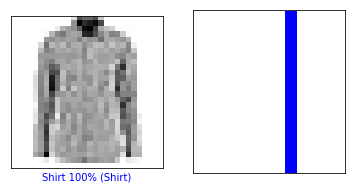

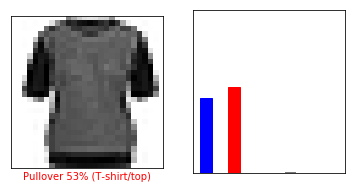

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

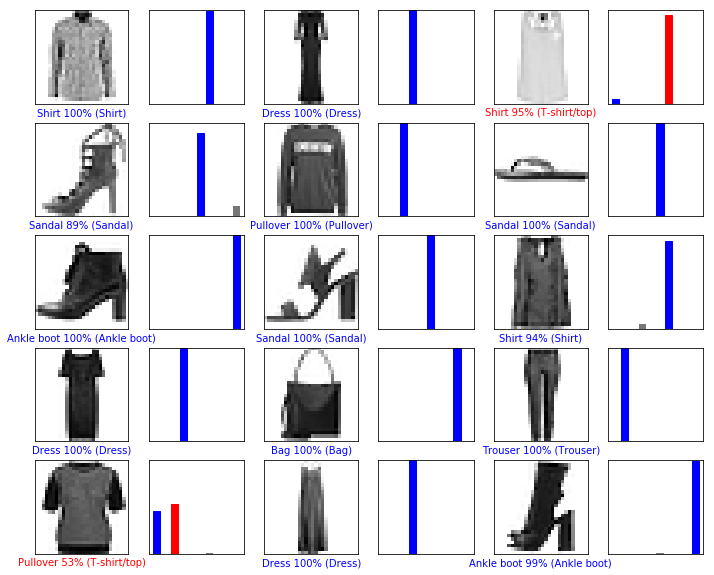

In [20]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)


In [22]:
img = test_images[0]

print(img.shape)
type(img)

img = np.array([img])

print(img.shape)

(28, 28, 1)
(1, 28, 28, 1)


[[8.6923957e-10 9.8043253e-13 1.0490123e-05 1.0987065e-09 4.1721119e-03
  1.0448192e-10 9.9581736e-01 7.1704258e-13 5.0247259e-12 7.1967752e-09]]


6

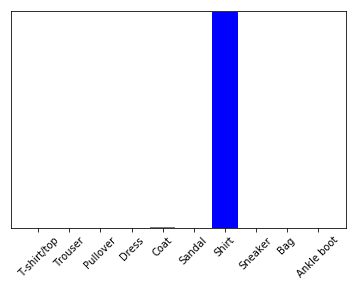

In [23]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


np.argmax(predictions_single[0])